# **Time Series Analysis of Bitcoin Price (2017–2025)**
**Author:** Khelili Selma  
**Date:** March 2025  
**Course:** TSAC 2024/2025  




## **Abstract**  
**Cryptocurrencies** are digital assets that have gained immense popularity in recent years, with **Bitcoin** being the most widely recognized. Due to their decentralized nature and high volatility, predicting cryptocurrency prices remains a challenging yet crucial task for investors, traders, and financial analysts. Accurate price forecasting can help mitigate risks and improve decision-making in the dynamic cryptocurrency market.

This study presents a comprehensive time series analysis **using R** of **Bitcoin prices** from **2017 to 2025**, collected at hourly intervals using **Binance’s API**.
> Given **Binance’s request limits**, a **Python pipeline(Data collection)** was implemented to **extract** over **66,000 rows** through **iterative API calls**. The primary objective is to explore trends, detect patterns, and develop predictive models for Bitcoin price forecasting.

After **EDA** and further data analysis, we identified a well-fitted statistical model: **ARIMA (AutoRegressive Integrated Moving Average)**.

By evaluating different ARIMA-based models, we aim to assess their strengths, limitations, and forecasting accuracy.

This study highlights key insights into Bitcoin’s price behavior, volatility patterns, and predictive reliability, offering a structured approach for future cryptocurrency price modeling.

The final models are evaluated based on performance metrics such as **RMSE** and **MAE**.


## **1. Introduction**  

Cryptocurrencies, particularly Bitcoin, have exhibited significant price volatility, making them an attractive subject for time series analysis and forecasting. This study(notebook) investigates the historical price movements of Bitcoin over an **eight-year period**, aiming to identify trends and develop forecasting models.
###**Data Collection :**
- 	The data was retrieved from Binance's API, with a **1-hour interval** spanning from **2017 to 2025**.
-	**Binance** imposes a **limit** on historical data retrieval, requiring looped API requests to extract a sufficiently large dataset.
-	The dataset includes over **60,000 observations**, containing Open, High, Low, Close (OHLC) prices, and trading volume.

###**Objective :**
Our aim is  to:
- Explore Bitcoin’s price trends and volatility.
- Identify the most suitable statistical forecasting model for this time series.
- Evaluate forecasting performance using error metrics (RMSE, MAE).
- Apply the most effective approach for Bitcoin price prediction.

By conducting a thorough time series analysis, this study contributes to the growing field of cryptocurrency market forecasting, providing insights that can be valuable for investors, traders, and financial analysts.


## **2. Model Specification**
This section details the methods used for analyzing Bitcoin price trends and selecting the best forecasting model.





### **2.1 Exploratory Data Analysis (EDA)**
Before selecting a time series model, it is crucial to understand the dataset’s structure, trends, seasonality, and potential anomalies.

The cryptocurrency dataset that is used in this analysis will be loaded from **google drive** after it was fetched using **Binance API in python**.

In [1]:
library(googledrive)

# 1. Authenticating with Google Drive
drive_auth()

# 2. Listing all files and folders
drive_find(n_max = 1000)

# 3. Listing files in a specific folder:
folder_id <- drive_find("CryptocurrencyAnalysisTSA", type = "folder")$id
drive_ls(as_id(folder_id))


The googledrive package is requesting access to your Google account.
Enter '1' to start a new auth process or select a pre-authorized account.
1: Send me to the browser for a new auth process.
2: selma.khelili@ensia.edu.dz


Selection: 2


Auto-refreshing stale OAuth token.

ERROR while rich displaying an object: Error in rbind(parts$upper, chars$ellip_v, parts$lower, deparse.level = 0L): number of columns of matrices must match (see arg 3)

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .   

name                           id                               
1 crypto_data_bitcoin_minute.csv 1Ok_tsGiqMFCZH6U1_BZHJOzSuowQt1Or
2 candlestick_chart.png          14Q9f-xaOXpNy1iNL4FSkHbUva9Kr7KxC
3 crypto_data_bitcoin_hourly.csv 1Cq-MCYyqpPkvKp4YtB4W_5l0oio-gRkg
  drive_resource <NA> <NA>  <NA>                             <NA> <NA> <NA>    
1 drive#file     csv  FALSE 8ed55fa36a8eae468e5b86d87d2700b5 TRUE TRUE text/csv
2 drive#file     csv  FALSE 8ed55fa36a8eae468e5b86d87d2700b5 TRUE TRUE text/csv
3 drive#file     csv  FALSE 8ed55fa36a8eae468e5b86d87d2700b5 TRUE TRUE text/csv
  <NA>                             
1 1gd9LW86-zF8LQismb5-4LS7p0YDblRCR
2 1gd9LW86-zF8LQismb5-4LS7p0YDblRCR
3 1gd9LW86-zF8LQismb5-4LS7p0YDblRCR
  <NA>                                                            <NA> 
1 https://drive-thirdparty.googleusercontent.com/16/type/text/csv FALSE
2 https://drive-thirdparty.googleusercontent.com/16/type/text/csv FALSE
3 https://drive-thirdparty.googleusercontent.com/16/type/text/csv FALSE
  <NA>                    <NA>       <NA> <NA>                
1 Selma (Student) Khelili drive#user TRUE 17381659614668792092
2 Selma (Student) Khelili drive#user TRUE 17381659614668792092
3 Selma (Student) Khelili drive#user TRUE 17381659614668792092
  <NA>                      
1 selma.khelili@ensia.edu.dz
2 selma.khelili@ensia.edu.dz
3 selma.khelili@ensia.edu.dz
  <NA>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1 https://lh3.googleusercontent.com/a-/ALV-UjUxA8RE2uvGDmdp_pjfY0-KurdlfFqtZ1yKT0SCwifCCh1pp52F6vun1jimNlT5lLmsV9KHSeMxcLXfQTKqpqIRzV6kKvji75ndpiETRguuQvMm00E---fezF6_AVX4NGjSAjFom5hWt1nKlxtCutogeZ0M7GzQAHZHqTmP-75AhKoJ_Jh8BwGlJXqKAGFCPnI-D7IpsAgYWoZNpizvHCSo3h4-ubv4UTVdHgCj6PE2BNfVeR6zAWIE_Yf_987Oi6H8iDd4tZ9qRkmJ_RpmlpkQca_7aj9q7bINxCPKCvVVxr3cRCFim-mId8Z3dt5lDoQm5URoqUt3TRzuKosUC3SkrN6uLVWjWM-d_ptsZ5GQE6LAFLoleGauYlH7olnQL3Q0_nh9DPM57W12BsdQX2oSk2BXcuK-3yHwxPAEM3pwESf2yfxIpK3ruvPe1Qs5ZIUZAurFSyV8HNNdihFGO7rvbRoS7z4Zle33d3g4bnQPpfyVkorwrQBdqgoazvAO-miXtm_BJxsNZbpRWjNDOc3q_MF1dISSSxqVILBqy80mJirw2wyVb7Mg-7Zn1IqdCSlH7b4zs-M-Fxoj6zDVP3bcKeAlXOsHnAg1rf3_SusGMG3P0J_K4i8nwwuPv-xMxsUGwQ4hLVers_FuF5Z1kgbYkGN22a55iQSCMvDC-RYCWmOGtVPpb5xiXskyULMDnStqYH5FqPgxl-F0H-fMCUsgL_YjUKyH-3ES2CDOe9o_tNubwTtsFoR1qxRR37LGNPX3Tr9zwrUurj7Znc0h_WSuLAGyvr6gsSYKdQgkBinQjFRG4cNj0fTzwPtpQzW7srGOoJ5KfnxFQQW8KipwBF5Yk_jX95TZpotgMjtYpoD_csFnr3q2xqUYO9EbWHWQAknZE6DSVH0auAONntpi36Anl9jVWjp6cHnI3LHrKTIpiqGDbc1n_Xi8o3pzmagDq0WAiRdizjV0f_X6KoS2fT_8RKey=s64
2 https://lh3.googleusercontent.com/a-/ALV-UjUxA8RE2uvGDmdp_pjfY0-KurdlfFqtZ1yKT0SCwifCCh1pp52F6vun1jimNlT5lLmsV9KHSeMxcLXfQTKqpqIRzV6kKvji75ndpiETRguuQvMm00E---fezF6_AVX4NGjSAjFom5hWt1nKlxtCutogeZ0M7GzQAHZHqTmP-75AhKoJ_Jh8BwGlJXqKAGFCPnI-D7IpsAgYWoZNpizvHCSo3h4-ubv4UTVdHgCj6PE2BNfVeR6zAWIE_Yf_987Oi6H8iDd4tZ9qRkmJ_RpmlpkQca_7aj9q7bINxCPKCvVVxr3cRCFim-mId8Z3dt5lDoQm5URoqUt3TRzuKosUC3SkrN6uLVWjWM-d_ptsZ5GQE6LAFLoleGauYlH7olnQL3Q0_nh9DPM57W12BsdQX2oSk2BXcuK-3yHwxPAEM3pwESf2yfxIpK3ruvPe1Qs5ZIUZAurFSyV8HNNdihFGO7rvbRoS7z4Zle33d3g4bnQPpfyVkor

In [2]:
drive_download(as_id("1Cq-MCYyqpPkvKp4YtB4W_5l0oio-gRkg"), path = "crypto_data_bitcoin_hourly.csv", overwrite = TRUE)

File downloaded:

• crypto_data_bitcoin_hourly.csv <id: 1Cq-MCYyqpPkvKp4YtB4W_5l0oio-gRkg>

Saved locally as:

• crypto_data_bitcoin_hourly.csv



In [1]:
data <- read.csv("crypto_data_bitcoin_hourly.csv")

#### 2.1.1 Summary Statistics of the Dataset
We first summarize the dataset to understand its central tendency and dispersion. This includes:
- Mean, median, standard deviation of Bitcoin prices.
- Checking for missing values.
- Identifying the overall range of prices.

In [2]:
# For data manipulation and visualization
library(tidyverse)

# Checking the structure of the dataset
str(data)

# Summary statistics
summary(data)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


'data.frame':	66530 obs. of  12 variables:
 $ Open_Time             : chr  "2025-02-11 22:00:00" "2025-02-11 23:00:00" "2025-02-12 00:00:00" "2025-02-12 01:00:00" ...
 $ Open                  : num  96390 95580 95778 96060 96207 ...
 $ High                  : num  96513 95967 96120 96264 96215 ...
 $ Low                   : num  95354 95490 95673 95818 95385 ...
 $ Close                 : num  95580 95778 96060 96207 95579 ...
 $ Volume                : num  844 531 577 373 658 ...
 $ Close_Time            : chr  "2025-02-11 22:59:59.999" "2025-02-11 23:59:59.999" "2025-02-12 00:59:59.999" "2025-02-12 01:59:59.999" ...
 $ Quote_Asset_Volume    : num  80956888 50830056 55288334 35839956 63000918 ...
 $ Number_of_Trades      : int  185649 129768 136856 94740 111288 147072 135940 86285 71227 79952 ...
 $ Taker_Buy_Base_Volume : num  384 269 242 179 244 ...
 $ Taker_Buy_Quote_Volume: num  36888144 25702706 23231154 17178540 23392376 ...
 $ Ignore                : int  0 0 0 0 0 0 0 0 0 0 .

  Open_Time              Open             High             Low        
 Length:66530       Min.   :  2871   Min.   :  2950   Min.   :  2817  
 Class :character   1st Qu.:  8672   1st Qu.:  8725   1st Qu.:  8630  
 Mode  :character   Median : 21220   Median : 21316   Median : 21131  
                    Mean   : 29055   Mean   : 29188   Mean   : 28914  
                    3rd Qu.: 43543   3rd Qu.: 43722   3rd Qu.: 43342  
                    Max.   :108320   Max.   :109588   Max.   :107781  
     Close            Volume          Close_Time        Quote_Asset_Volume 
 Min.   :  2919   Min.   :     0.0   Length:66530       Min.   :0.000e+00  
 1st Qu.:  8672   1st Qu.:   867.5   Class :character   1st Qu.:1.204e+07  
 Median : 21221   Median :  1537.3   Mode  :character   Median :3.627e+07  
 Mean   : 29056   Mean   :  2793.9                      Mean   :7.304e+07  
 3rd Qu.: 43543   3rd Qu.:  2965.0                      3rd Qu.:9.408e+07  
 Max.   :108320   Max.   :137207.2             

In [3]:
# First few rows
head(data)

,Open_Time,Open,High,Low,Close,Volume,Close_Time,Quote_Asset_Volume,Number_of_Trades,Taker_Buy_Base_Volume,Taker_Buy_Quote_Volume,Ignore
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,2025-02-11 22:00:00,96390.22,96512.70,95353.64,95580.23,843.5575,2025-02-11 22:59:59.999,80956888,185649,384.3442,36888144,0
2,2025-02-11 23:00:00,95580.24,95966.65,95490.05,95778.20,531.0058,2025-02-11 23:59:59.999,50830056,129768,268.5500,25702706,0
3,2025-02-12 00:00:00,95778.21,96120.00,95672.56,96060.00,576.6256,2025-02-12 00:59:59.999,55288334,136856,242.2345,23231154,0
4,2025-02-12 01:00:00,96060.00,96263.99,95817.69,96207.32,373.2663,2025-02-12 01:59:59.999,35839956,94740,178.8553,17178540,0
5,2025-02-12 02:00:00,96207.33,96214.70,95384.61,95579.14,657.6960,2025-02-12 02:59:59.999,63000918,111288,244.3059,23392376,0
6,2025-02-12 03:00:00,95579.13,95762.67,95100.00,95299.27,799.7334,2025-02-12 03:59:59.999,76347587,147072,366.9130,35024680,0


Our dataset is a time series dataset with cryptocurrency price data, including open, high, low, close prices, volume, and trade-related metrics, observations are at 1h intervals.

**Price Variables (Open, High, Low, Close):**
  - **Open Price:** The price at which trading started in that interval.

  - **High Price:** The highest recorded price in that interval.

  - **Low Price:** The lowest recorded price in that interval.

  - **Close Price:** The final price when the interval ended.

**Observations:**

Prices range from a minimum of 2,871 to a maximum of 108,320.

Median price: ~21,220

Mean price: ~29,055 (slightly skewed by higher values).

Some large price fluctuations, indicate a volatile market.

**Trading Activity (Volume, Number_of_Trades):**
  - Volume: Total quantity traded during the interval.

  - Number_of_Trades: Count of executed trades.

**Observations:** Volume varies significantly, from 0 to 137,207. Trades range from 0 to 1,542,742, suggesting periods of high and low activity.

**Buy-Side Activity(Taker_Buy_Base_Volume,  Taker_Buy_Quote_Volume):**
  - Base Volume: The number of units bought at market price.

  - Quote Volume: The monetary value of those purchases.

**Observations:** There is significant variability in buy orders. High max values (e.g., Taker_Buy_Quote_Volume peaks at 1.5 billion) suggest institutional activity.

**Ignore Column :**
Always 0, meaning it is likely irrelevant.



#### **2.1.2 Data Preprocessing**
Our next steps are:
- Check for missing values
- Drop unecessary and redundant columns
- Convert Open_Time and Close_Time to datetime format

In [90]:
install.packages("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# Load necessary libraries
library(dplyr)
library(lubridate)

# Check for missing values
sum(is.na(data))
#Remove them
data <- na.omit(data)
# Drop unnecessary columns
data <- data %>%
  select(-Ignore)  # Remove 'Ignore' column

# Convert Open_Time and Close_Time to datetime format
data <- data %>%
  mutate(
    Open_Time = ymd_hms(Open_Time),
    Close_Time = ymd_hms(Close_Time)
  )
# Reverse the data order so that the oldest entries come first
data <- data[order(data$Open_Time), ]

# Display first few rows to confirm changes
head(data)


[1] 0

,Open_Time,Open,High,Low,Close,Volume,Close_Time,Quote_Asset_Volume,Number_of_Trades,Taker_Buy_Base_Volume,Taker_Buy_Quote_Volume
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<int>,<dbl>,<dbl>
66001,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-17 04:59:59,202366.138,171,35.160503,150952.478
66002,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 05:59:59,100304.824,102,21.448071,92608.280
66003,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 06:59:59,31282.313,36,4.802861,20795.317
66004,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 07:59:59,19241.058,25,2.602292,11291.347
66005,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 08:59:59,4239.504,28,0.814655,3552.747
66006,2017-08-17 09:00:00,4360.00,4445.78,4360.00,4444.00,10.763623,2017-08-17 09:59:59,47219.356,43,10.258400,44995.378


There are no missing values in the dataset

#### 2.1.3 Time Series Visualization
We'll now plot the Bitcoin price to see patterns and discover trends.

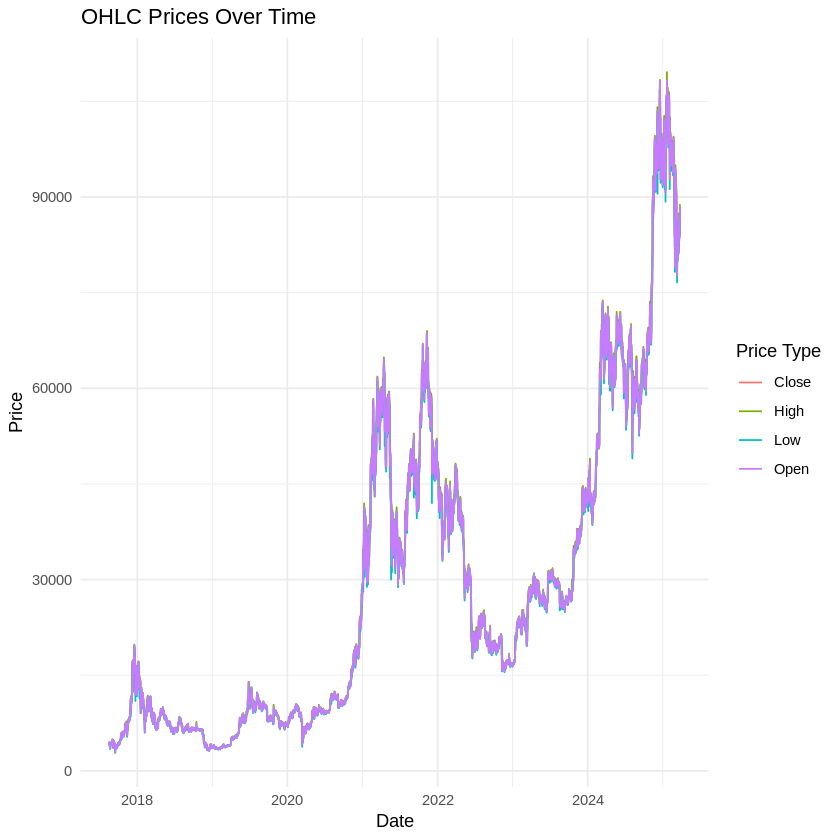

In [7]:
library(ggplot2)
library(dplyr)

# Reshape data from wide to long format so we can plot multiple price types.
data_long <- data %>%
  select(Open_Time, Open, High, Low, Close) %>%
  pivot_longer(cols = c(Open, High, Low, Close),
               names_to = "Price_Type",
               values_to = "Price")

# Plot
ggplot(data_long, aes(x = Open_Time, y = Price, color = Price_Type)) +
  geom_line() +
  labs(title = "OHLC Prices Over Time",
       x = "Date",
       y = "Price",
       color = "Price Type") +
  theme_minimal()


**Interpretation of the Plot :**  
**Price Trends Over Time :**  
- The price fluctuates significantly, showing strong upward and downward trends.  
- An overall upward trend is evident, with notable growth from **2021 onwards**, aligning with Bitcoin's mainstream adoption.  
- Peaks around **late 2021** coincide with Bitcoin’s all-time highs before market corrections due to rising interest rates and regulatory scrutiny.  
- Another peak in **late 2024** aligns with the approval of Bitcoin ETFs, which improved accessibility and investor confidence.  
- This pattern suggests that our series values are highly correlated over time, reflecting macroeconomic and regulatory influences on Bitcoin's price.  

**Overlapping Lines :**  
- The **Open, High, Low, and Close** prices remain close to each other, indicating relatively stable intraday price differences.
- However, significant market movements sometimes result in gaps between these values (for instance, the blue plot appearing below the purple one). Since these gaps are infrequent, it may be reasonable to choose just one of these prices (typically Close) for further analysis to avoid unnecessary complexity.

- A **candlestick chart** might be better suited to visualize these variations (we used it below).  

**Volatility Observations :**  
- Noticeable sharp increases and drops indicate periods of **high volatility**.  
- The **2021-2023 fluctuations** reflect Bitcoin’s response to rising interest rates, inflation concerns, and regulatory challenges.  
- The **2024 price surge** aligns with ETF approvals, which made Bitcoin a more attractive and stable investment for institutional players.  
- These fluctuations highlight how external market forces—such as monetary policy, institutional adoption, and regulations—significantly impact Bitcoin’s price movements.  


A candlestick chart is great for capturing price movements because it shows the Open, High, Low, and Close (OHLC) prices in a more intuitive way. Each candlestick represents a time period, with colors indicating whether the price went up or down.

The following code was used in python to produce the chart as the equivalent in R didn't show the desired plot

In [8]:
drive_download(as_id("14Q9f-xaOXpNy1iNL4FSkHbUva9Kr7KxC"), path = "candlestick_chart.png", overwrite = TRUE)

File downloaded:

• candlestick_chart.png <id: 14Q9f-xaOXpNy1iNL4FSkHbUva9Kr7KxC>

Saved locally as:

• candlestick_chart.png



In [94]:
install.packages("png")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



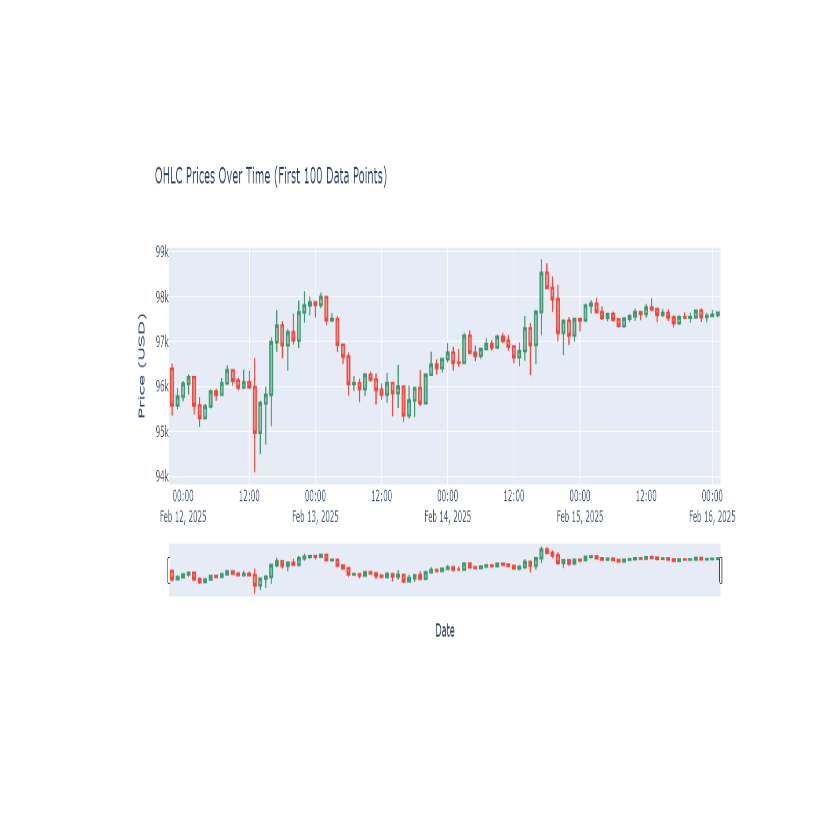

In [9]:
library(png)

# Loading the PNG image
img <- readPNG("candlestick_chart.png")

# Plot the image
plot(1:2, type = "n", xlab = "", ylab = "", axes = FALSE)
rasterImage(img, 1, 1, 2, 2)


We used only 100 rows from the 66k rows of the data to be able to see candles clearly.
**Interpretation of the Plot:**

**Price Trends Over Time:**
- **Fluctuations and Trends:**  
  From the candlestick chart, we can see that Bitcoin's price fluctuates significantly over time even in a span of 4 days, Bitcoin's price shows a clear upward trend, reflecting increased interest in the asset.
  
- **Upward Momentum and Peaks:**  
  The chart shows a strong upward trend just like the previous plot.

 **Volatility Observations:**

    - **Intraday Price Action:**
      - **February 12th-16th, 2025:** The price fluctuates within the day, as indicated by a mixture of **green and red candlesticks**, each representing intraday price movements. These short-term fluctuations reflect how the market responds to news, sentiment, or technical trading patterns.
    
    - **Green Candlesticks:** Suggest upward price movements within that period, indicating buying pressure or positive sentiment.
    
    - **Red Candlesticks:** Suggest downward price movements, indicating selling pressure or a bearish market sentiment.

  - **Wicks as Indicators of Volatility:**  
    - The **upper wicks** show the highest price reached during that timeframe, and the **lower wicks** show the lowest price. Long wicks indicate high intraday volatility, where the price fluctuates significantly within that timeframe before closing either higher or lower.
    
    - For instance, on **February 12th**, the first candlestick is red, indicating a drop from open to close. The long **lower wick** suggests that the price dropped significantly but recovered a bit before closing. This could indicate market uncertainty.






**Final Takeaways:**
- **Volatility:** Volatility is evident in this time series both daily, weekly, monthly and yearly.

- **Trends:** Bitcoin’s price shows an upward global trands, that is highly correlated with global economic events, such as inflation, interest rates, and regulatory developments, which shape the broader price trajectory.
- In further analysis we will be using the **Close price** only to avoid unnecessary complexity.

#####2.1.3.1 Data Decomposition and Seasonality

In [6]:
install.packages("xts")
install.packages("zoo")
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
library(xts)
library(ggplot2)
library(forecast)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                                #
#                                                                             #
# Code in packages is not affected. It's protected by 

In [11]:
#We will use the Close price with Close_Time or Open_Time in furtehr steps
data_close <- data[, c("Close", "Close_Time")]

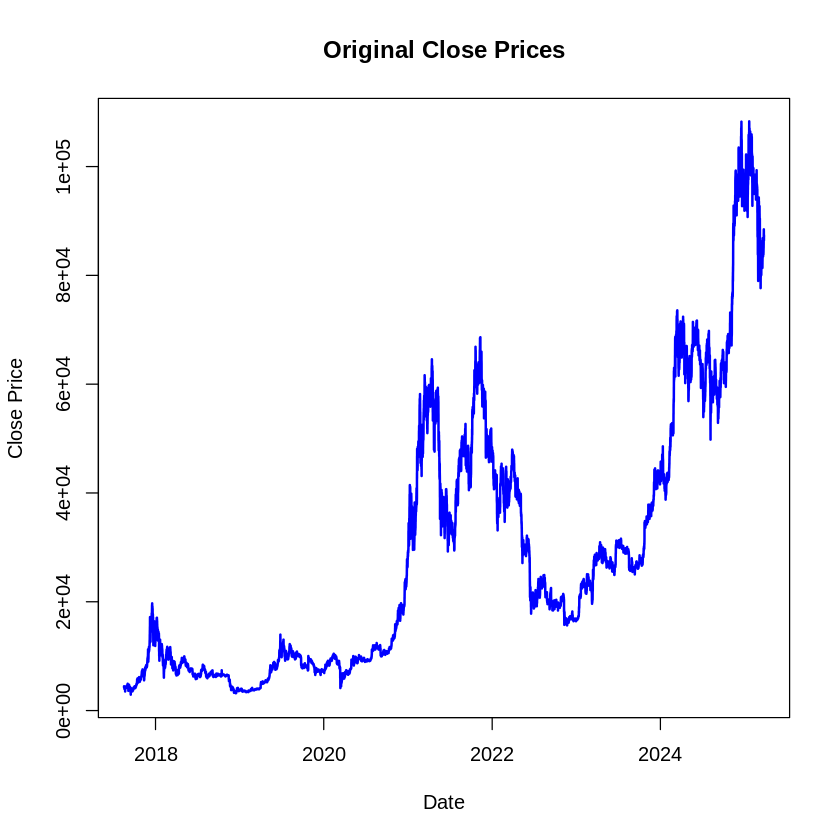

In [12]:
# Plot only the original dataset (close prices)
plot(data_close$Close_Time, data_close$Close, type = "l", col = "blue", lwd = 2,
     xlab = "Date", ylab = "Close Price", main = "Original Close Prices")

In [13]:
head(data_close)
data_close <- na.omit(data_close)
nrow(data_close) # Number of rows

,Close,Close_Time
,<dbl>,<dttm>
66001,4308.83,2017-08-17 04:59:59
66002,4315.32,2017-08-17 05:59:59
66003,4324.35,2017-08-17 06:59:59
66004,4349.99,2017-08-17 07:59:59
66005,4360.69,2017-08-17 08:59:59
66006,4444.00,2017-08-17 09:59:59


[1] 66530

In [14]:
# Converting data for analysis
data_close$time <- as.POSIXct(data_close$Close_Time, origin = "1970-01-01", tz = "GMT")
data_close$time <- as.Date(data_close$time)
data_close$Close_Time = NULL
head(data_close)

,Close,time
,<dbl>,<date>
66001,4308.83,2017-08-17
66002,4315.32,2017-08-17
66003,4324.35,2017-08-17
66004,4349.99,2017-08-17
66005,4360.69,2017-08-17
66006,4444.00,2017-08-17


In [15]:
# Converting 'time' column to POSIXct format
data_close$time <- as.POSIXct(data_close$time, format="%Y-%m-%d", tz="UTC")

Because the data is too dense, we will reduce the number of rows in this analysis from 66k to 1800 rows, we will take 600 from the head, 600 from the tail and 600 from the middle

In [16]:
# Total number of rows
n <- nrow(data_close)

# Computing the starting and ending indices for the middle 600 rows
start_idx <- floor((n - 600) / 2) + 1
end_idx <- start_idx + 599  # Since we need 600 rows in the middle

# Extracting the middle 600 rows
data_middle <- data_close[start_idx:end_idx, ]
data_end <- data_close[1:600, ]
data_start <- data_close <- tail(data_close, 600)

In [17]:
print("data_start :")
head(data_start)
print("data_middle :")
head(data_middle)
print("data_end :")
head(data_end)
data_start <- na.omit(data_start)
data_middle <- na.omit(data_middle)
data_end <- na.omit(data_end)

[1] "data_start :"


,Close,time
,<dbl>,<dttm>
401,82105.05,2025-02-28
402,84005.05,2025-02-28
403,84363.69,2025-02-28
404,83605.12,2025-02-28
405,84440.97,2025-02-28
406,84449.99,2025-02-28


[1] "data_middle :"


,Close,time
,<dbl>,<dttm>
33436,38626.63,2021-05-26
33437,38485.10,2021-05-26
33438,38719.48,2021-05-26
33439,39030.74,2021-05-26
33440,38957.84,2021-05-26
33441,39241.91,2021-05-26


[1] "data_end :"


,Close,time
,<dbl>,<dttm>
66001,4308.83,2017-08-17
66002,4315.32,2017-08-17
66003,4324.35,2017-08-17
66004,4349.99,2017-08-17
66005,4360.69,2017-08-17
66006,4444.00,2017-08-17


In [18]:
# Convert to xts object (using Close as the time series data)
close_xts_start <- xts(data_start$Close, order.by = data_start$time)
close_xts_middle <- xts(data_middle$Close, order.by = data_middle$time)
close_xts_end <- xts(data_end$Close, order.by = data_end$time)

# Print and check
print(close_xts_start)

Warning message:
“object timezone ('UTC') is different from system timezone ('')
  NOTE: set 'options(xts_check_TZ = FALSE)' to disable this warning
    This note is displayed once per session”


           m.c.seq.row..seq.n...seq.col..drop...FALSE.
2025-02-28                                    82105.05
2025-02-28                                    84005.05
2025-02-28                                    84363.69
2025-02-28                                    83605.12
2025-02-28                                    84440.97
2025-02-28                                    84449.99
2025-02-28                                    84191.27
2025-02-28                                    84258.37
2025-02-28                                    84149.98
2025-02-28                                    84349.94
       ...                                            
2025-03-25                                    86547.17
2025-03-25                                    86656.07
2025-03-25                                    86534.50
2025-03-25                                    86436.82
2025-03-25                                    86714.79
2025-03-25                                    87221.66
2025-03-25

In [19]:
close_ts_start <- ts(as.numeric(close_xts_start[, 1]), frequency = 24, start = c(2025, 1, 1))
close_ts_middle <- ts(as.numeric(close_xts_middle[, 1]), frequency = 24, start = c(2025, 1, 1))
close_ts_end <- ts(as.numeric(close_xts_end[, 1]), frequency = 24, start = c(2025, 1, 1))


In [20]:
print(is.numeric(close_ts_start))

[1] TRUE


In [21]:
head(close_ts_start)

A Time Series:
[1] 82105.05 84005.05 84363.69 83605.12 84440.97 84449.99

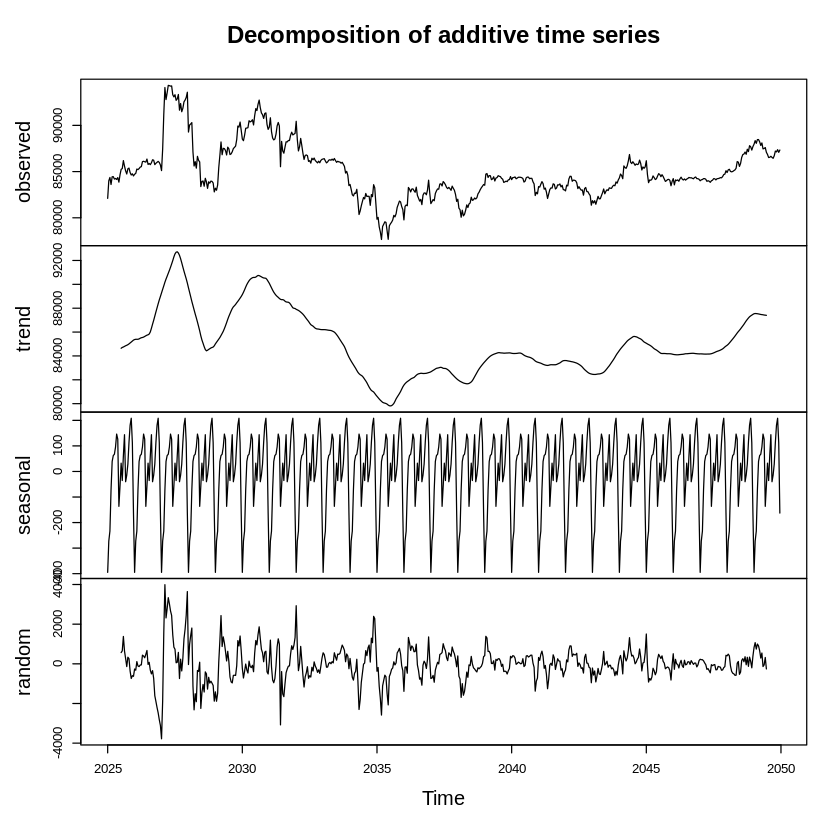

In [23]:
close_decomp_start <- decompose(close_ts_start)
plot(close_decomp_start)

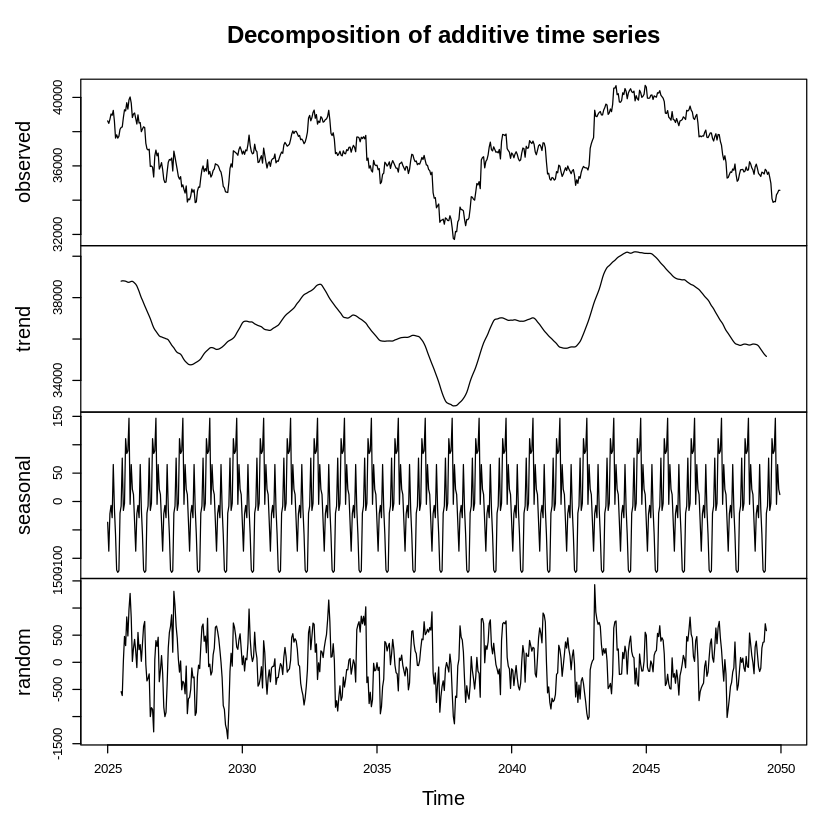

In [24]:
close_decomp_middle <- decompose(close_ts_middle)
plot(close_decomp_middle)

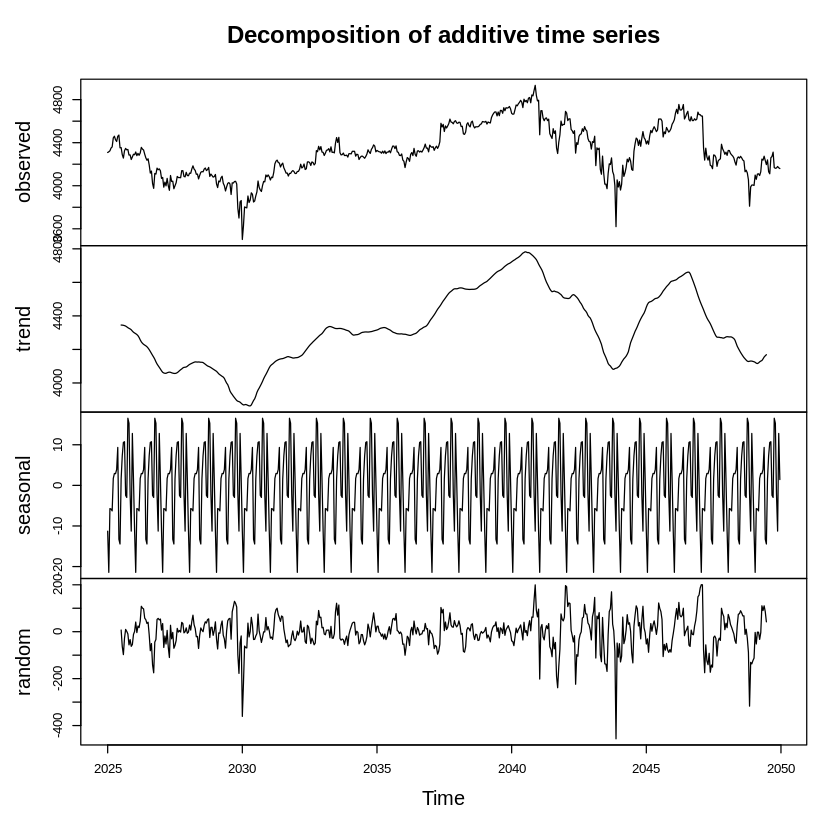

In [25]:
close_decomp_end <- decompose(close_ts_end)
plot(close_decomp_end)

**Observation :**
Each decomposition plot consists of four parts:
- **Observed:** The original time series.
- **Trend:** The long-term movement in the data.
- **Seasonal:** Repeating patterns over time.
- **Random/Residual:** Unexplained variations (noise).  

###### **Analysis of Results**  

**First 600 Rows (Start)**
- **Trend:** Appears to be **increasing** initially.
- **Seasonality:** Seems relatively stable with clear periodic cycles.
- **Residuals:** Increasing fluctuations towards the end.

🔹 **Interpretation:**  
This period likely represents an early upward movement in the market, with stable seasonal patterns.  

**Middle 600 Rows**  
- **Trend:** Shows a **declining** pattern.
- **Seasonality:** Still present, but possibly weaker.
- **Residuals:** Appear more spread out with more oscillations indicating more market fluctuations.  

🔹 **Interpretation:**  
This middle section suggests a **downtrend** in the market. The seasonality remains but could be weaker due to shifts in the market.  

**Last 600 Rows (End)**  
- **Trend:** Looks **more volatile**, with both upward and downward movements.
- **Seasonality:** Still present, but changes in magnitude.
- **Residuals:** Show more randomness towards the end.

🔹 **Interpretation:**  
The last section shows a **more uncertain market**, where price movements fluctuate more compared to the start. This could indicate external factors influencing prices.  

**Overall Conclusion**  
Our decomposition suggests that:
- The **beginning** had a strong upward trend.  
- The **middle** showed a decline.  
- The **end** had more **volatility and uncertainty**.  
 This observation matches the previous plots of the original data.

**Final Takeways**
- Since there is an overall upward trend, we need to detrend the data before modeling.

- While small subsets of the data show seasonal patterns, SARIMA might work for smaller cryptocurrency datasets if we can accurately determine the periodicity.

- However, for large datasets(our case of 66 thousand row), identifying a consistent seasonal period is challenging due to frequent oscillations and overlapping cycles, making SARIMA less reliable.

  #### **2.1.4 Checking for outliers**

In [26]:
Q1 <- quantile(data$Close, 0.25)
Q3 <- quantile(data$Close, 0.75)
IQR <- Q3 - Q1

lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR
data_Close <-data["Close"]

outliers <- data[data_Close$Close < lower_bound | data_Close$Close > upper_bound, ]
print(nrow(outliers))

[1] 1733


We notice 2% of our dataset constituts outliers, and since our goal is forecasting, handling outliers properly is important because they can impact our model’s accuracy.

In financial time series (stocks, crypto, etc.), large fluctuations are part of the trend. Removing them blindly might make our model miss important price movements.

So instead of removing them, we can log transform our data to reduce extreme fluctuations:
- ``
data$Close <- log(data$Close)``
This is useful if since EDA we found that our prices vary significantly over time.

-  Or use **Winsorization (Capping Outliers)** if some values are way too extreme but of course still meaningful:
``
data$Close[data$Close < lower_bound] <- lower_bound
data$Close[data$Close > upper_bound] <- upper_bound``
This prevents outliers from dominating the model but keeps their impact.


The presence of outliers also can direct us in our search of the best model and that is by choosing to use Robust Forecasting Models
that handle well data fluctuation and volatility:

ARIMA (adjusted for outliers)

Exponential Smoothing (ETS)


#### **2.1.5 Is the series Stationarity? Does it follow a normal distribution?**
To check if the data is stationary, we will calculate the mean, visualize the acf function of the datset and finally we will use the Augmented Dickey-Fuller (ADF) test.

Checking the Mean (Constant Mean Test):
- For a stationary time series, the mean should remain roughly constant over time. We can check this by plotting a rolling mean:

In [112]:
install.packages("zoo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




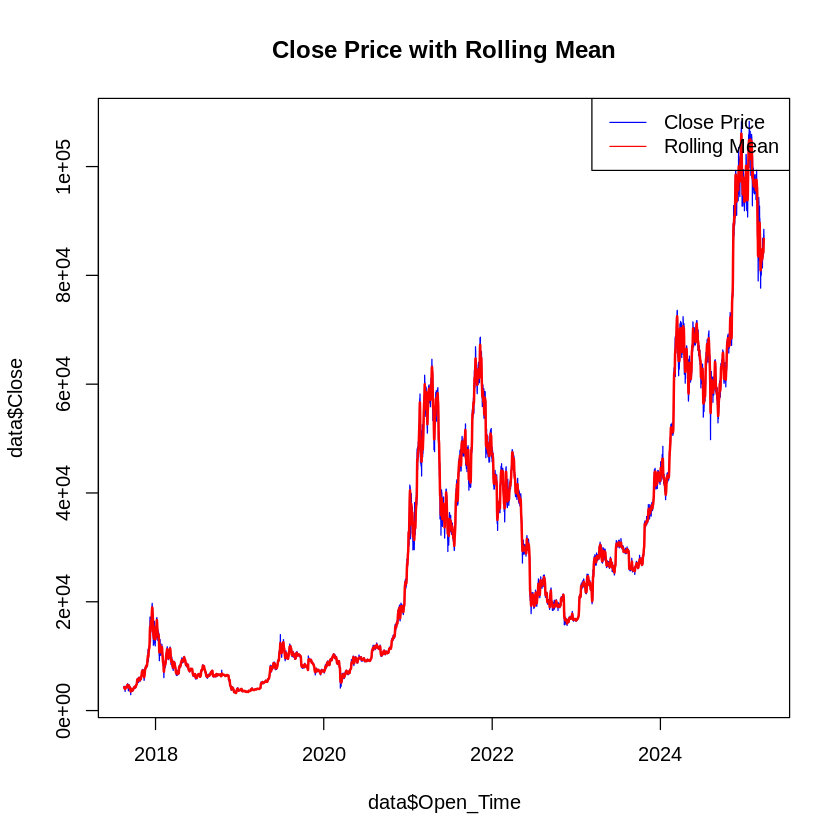

In [5]:
library(zoo)


# Compute rolling mean (window size 50)
data$rolling_mean <- rollmean(data$Close, k = 50, fill = NA)

# Plot
plot(data$Open_Time, data$Close, type = "l", col = "blue", main = "Close Price with Rolling Mean")
lines(data$Open_Time, data$rolling_mean, col = "red", lwd = 2)  # Red line = rolling mean
legend("topright", legend = c("Close Price", "Rolling Mean"), col = c("blue", "red"), lty = 1)


Since the red line (rolling mean) fluctuates a lot as it moves along with the price trend, which suggests that the data is not stationary.

Check the Autocorrelation Function (ACF):
- ACF helps determine if past values influence future values (memory effect). A stationary series should have rapidly decaying ACF values(drops to 0 quickly after a few lags)  since it suggests no long-term dependence..


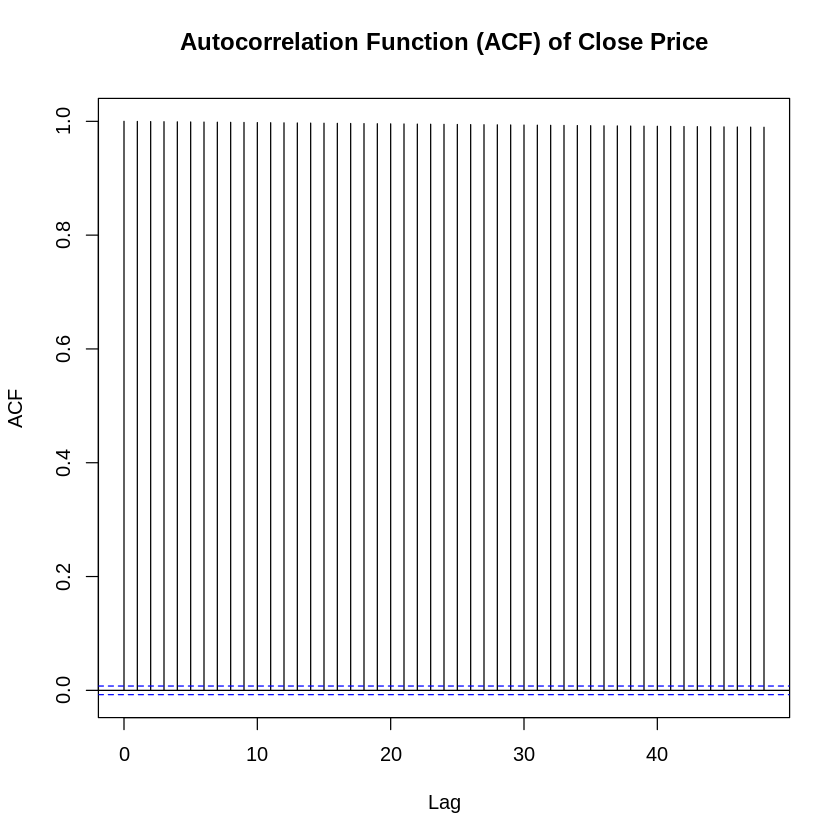

In [33]:
library(forecast)

acf(data$Close, main = "Autocorrelation Function (ACF) of Close Price")


Our ACF plot shows strong autocorrelations at all lags, which is a clear sign of a non-stationary series:
- The ACF does not decay rapidly but stays close to 1 at all lags, which suggests a trend or unit root (random walk behavior).
- This confirms that the data is likely non-stationary.

Finally, we will preform ADF Test (Augmented Dickey-Fuller Test) as a final test

In [34]:
install.packages("tseries")
# Loading the package
library(tseries)
# Runing the test
adf.test(data$Close)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Augmented Dickey-Fuller Test

data:  data$Close
Dickey-Fuller = -3.907, Lag order = 40, p-value = 0.01299
alternative hypothesis: stationary


**Comparing the p-value to 0.05 (5% significance level):**

- p-value = 0.01299 is less than 0.05

- So reject the null hypothesis that a unit root is present, indicating the series is stationary.

However, this contradicts the ACF plot, which strongly suggests non-stationarity.

In this situation we will perform a first-order difference: $$ Close\_diff_t = Close_t - Close_{t-1} $$
  and if differencing removes the strong autocorrelation and the ADF test confirms stationarity, then the original data was non-stationary.

In [35]:
# Creating a copy
data_copy <- data
# Applying differencing
data_copy$Close_diff <- c(NA, diff(data_copy$Close))

Warning message in adf.test(na.omit(data_copy$Close_diff)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  na.omit(data_copy$Close_diff)
Dickey-Fuller = -41.045, Lag order = 40, p-value = 0.01
alternative hypothesis: stationary


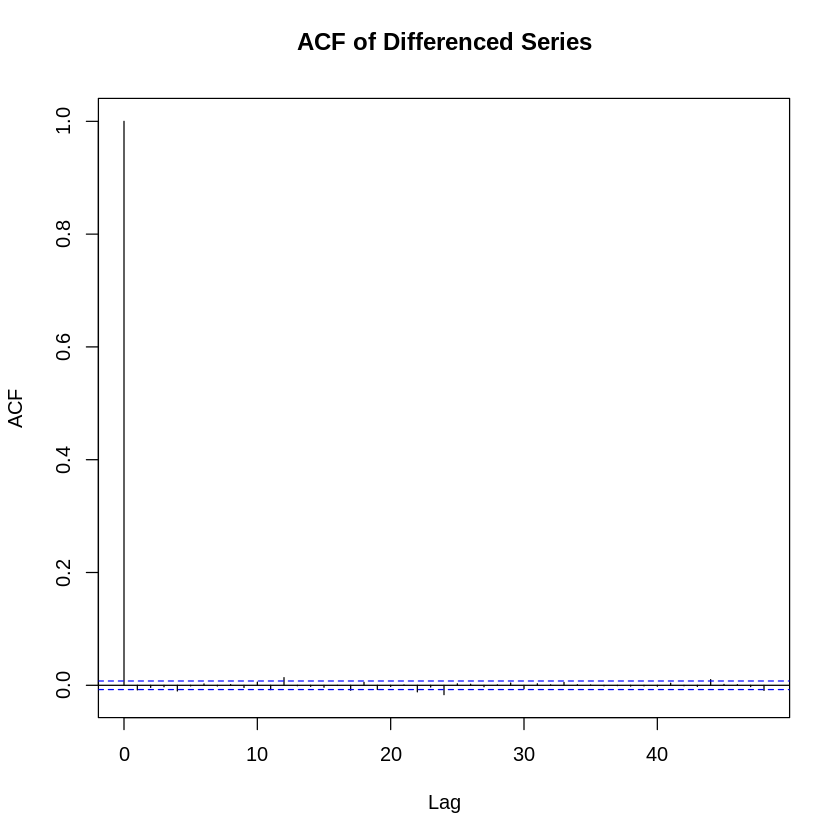

In [36]:
acf(na.omit(data_copy$Close_diff), main="ACF of Differenced Series")  # ACF of differenced data
adf.test(na.omit(data_copy$Close_diff))  # ADF test on differenced data


Observations:
- The first lag has a high correlation (expected after differencing).

- All other lags are close to zero and within the confidence interval (blue dashed lines).

- This means the time series is now stationary (no long-term dependencies).

- The ADF test suggests that the series is stationary

Conclusion:
- The series was non-stationary at first, but differencing can help make it stationary.  



We will now check if the series follows a normal distribution

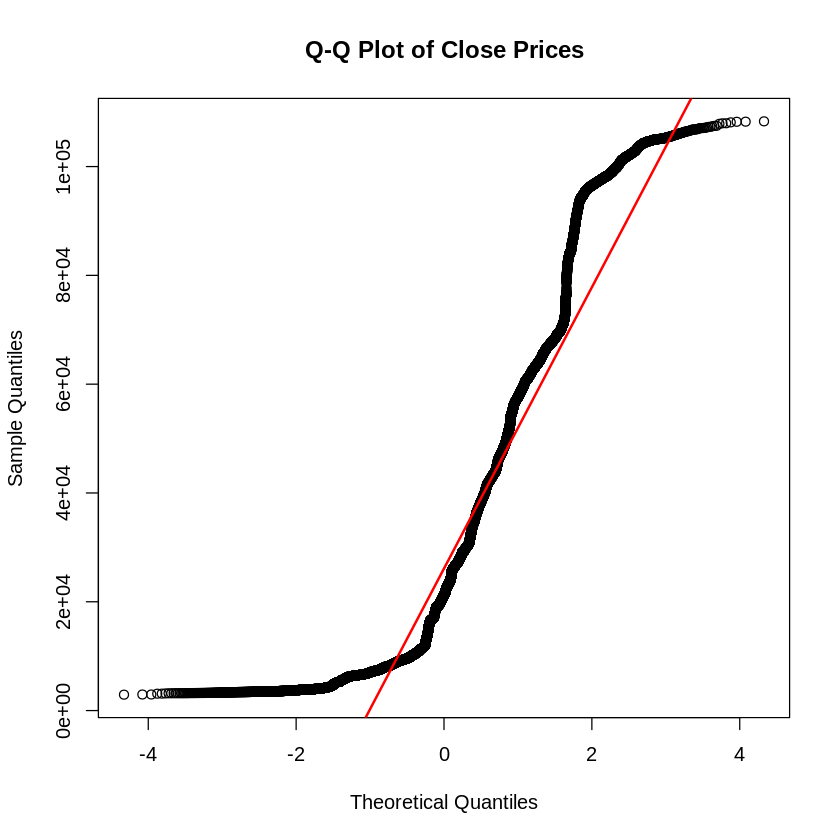

In [37]:
# Q-Q plot using base R
qqnorm(data$Close, main="Q-Q Plot of Close Prices")
qqline(data$Close, col="red", lwd=2)  # Add reference line


**Deviations from Normality:**

- The points deviate significantly from the red diagonal line, especially in the tails, indicating a non-normal distribution.

**Heavy Tails (Skewness or Kurtosis):**
> - The curvature in the lower-left and upper-right suggests heavy tails (either right-skewed or left-skewed data).
> - The sharp bend upwards suggests that large values (outliers) exist.

Possible Power Law Distribution:

The pattern suggests that our data might follow a power-law distribution rather than a normal one.

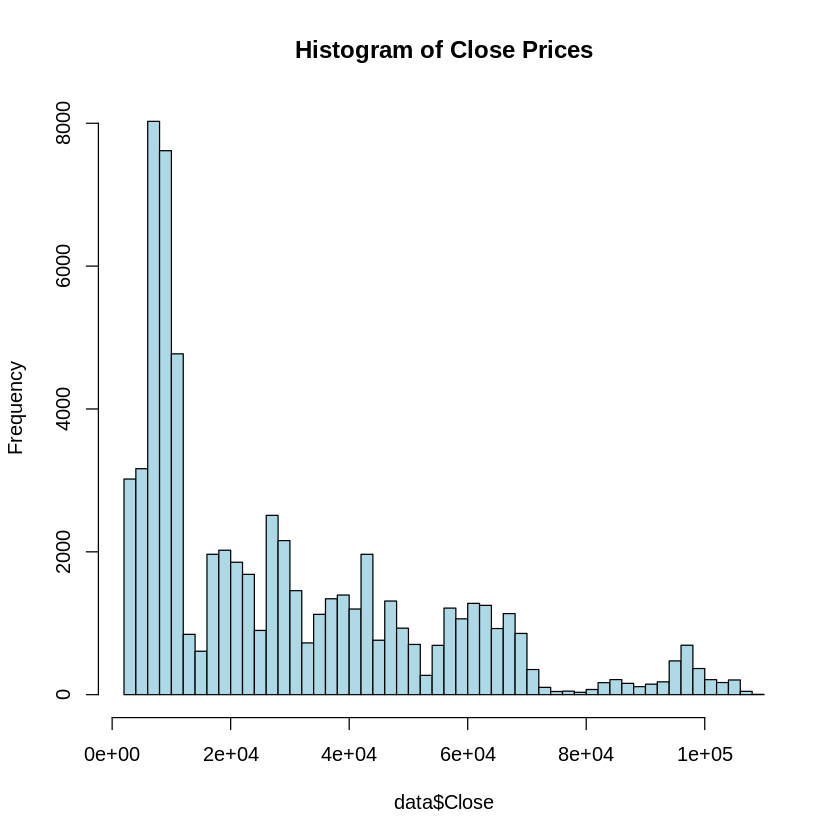

In [38]:
hist(data$Close, breaks=50, main="Histogram of Close Prices", col="lightblue")

**Right-Skewed Distribution (Positive Skewness)**

- Most values are concentrated near zero.

- A long right tail extends toward higher values, meaning some prices are much larger than the majority.

**Heavy-Tailed & Non-Normal**

- The frequency of smaller values is much higher than larger ones.

-This confirms non-normality, as suggested by the Q-Q plot

**Kolmogorov-Smirnov Test**
> The Shapiro-Wilk test has a sample size limit of 3 to 5000 observations, so since our dataset has more than 5000 rows(66k), the test won't work.

In [39]:
ks.test(data$Close, "pnorm", mean(data$Close, na.rm=TRUE), sd(data$Close, na.rm=TRUE))


Warning message in ks.test.default(data$Close, "pnorm", mean(data$Close, na.rm = TRUE), :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data$Close
D = 0.15585, p-value < 2.2e-16
alternative hypothesis: two-sided


> D = 0.15585
  - This measures the maximum difference between our dataset's cumulative distribution and a normal distribution.
  - A higher D-value suggests that our data deviates significantly from normality.

> p-value < 2.2e-16
  - This is extremely small, meaning we strongly reject the null hypothesis that data$Close follows a normal distribution.

This confirms that our Close prices are not normally distributed.

### 2.2 Transformation & Advanced Processing


#### 2.2.1 Stabilizing the variance

##### Box-Cox Transformation vs Log Transformation

The **Box-Cox transformation** is used to stabilize variance and make data more normally distributed. It is defined as:


Y(λ)=
\begin{cases}
\frac{y^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\
\log(y) & \text{if } \lambda = 0
\end{cases}


Where:
- **Y** is the original data.
- **lambda** is the transformation parameter, chosen to minimize skewness and stabilize variance.


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



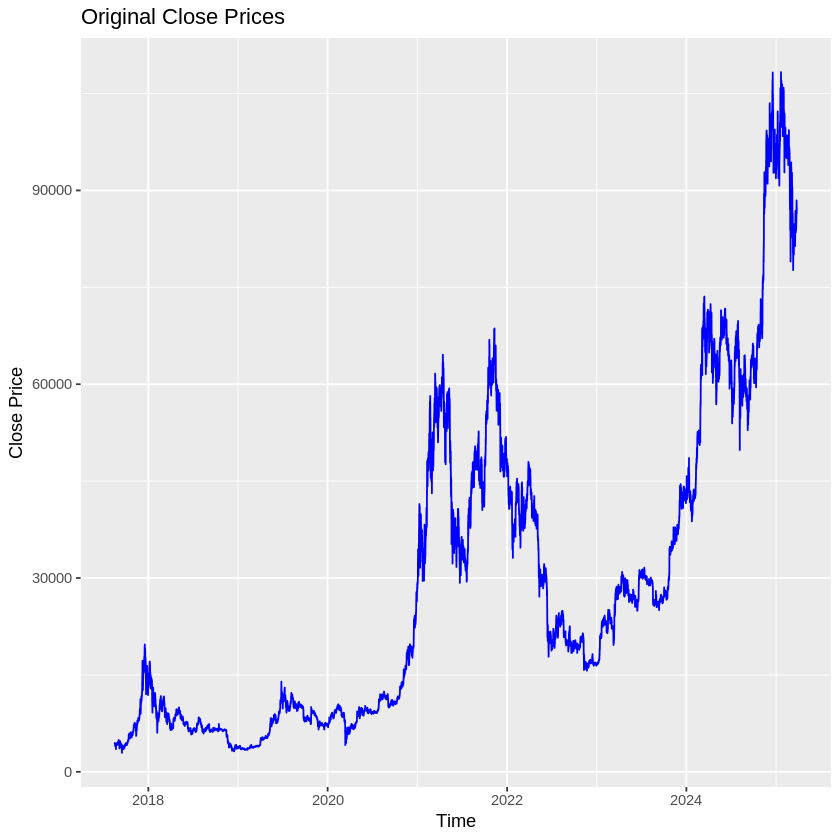

In [6]:
# Reload libraries
library(tidyverse)
library(tseries)
library(forecast)

# Select only Open_Time and Close columns
df <- data %>% select(Open_Time, Close)

# Convert Close price column to numeric
df$Close <- as.numeric(df$Close)

# Ensure all Close values are positive for Box-Cox transformation
if (min(df$Close) <= 0) {
  df$Close <- df$Close + abs(min(df$Close)) + 1
}
# The original close price plot
ggplot(df, aes(x = Open_Time, y = Close)) +
  geom_line(color = "blue") +
  ggtitle("Original Close Prices") +
  ylab("Close Price") +
  xlab("Time")

In [7]:
# Convert Close prices to a time series
close_ts <- ts(df$Close)

# First method : Box-Cox transformation
lambda1 <- BoxCox.lambda(close_ts)
boxcox_close_ts <- BoxCox(close_ts, lambda1)


In [8]:
# Second method : Apply log transformation
log_close_ts <- log(close_ts)

Box-Cox , log transformation comparaison:
> Box-Cox Transformation:
  - Pros:
    - Handles variance stabilization better than log transformation.
    - Finds an optimal λ to ensure normality.
    - Works well if data contains zero or negative values (unlike log).
  - Cons:
    - Interpretation of transformed values is less intuitive compared to log.
    - Sensitive to extreme outliers.

> Log Transformation (Bottom Plot - Green):
  - Pros:
    - Simple and easily interpretable (reduces scale without distortion).
    - Handles exponential growth effectively.
    - Works well for financial & stock price data.
  -  Cons:
    - Only works for strictly positive values.
    - Doesn't always stabilize variance as effectively as Box-Cox.

Since we are dealing with cryptocurrency prices, if the results are satisfactory we will work with log

In [156]:
install.packages("gridExtra")
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


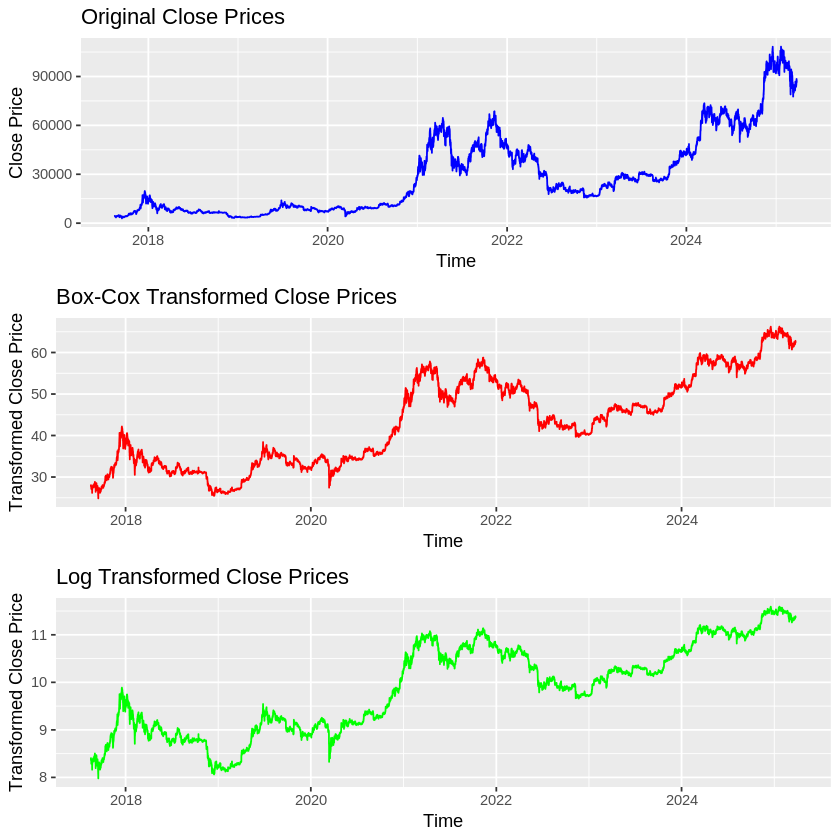

In [13]:
# Create plots
p1 <- ggplot(df, aes(x = Open_Time, y = Close)) +
  geom_line(color = "blue") +
  ggtitle("Original Close Prices") +
  ylab("Close Price") +
  xlab("Time")

p2 <- ggplot(df, aes(x = Open_Time, y = boxcox_close_ts)) +
  geom_line(color = "red") +
  ggtitle("Box-Cox Transformed Close Prices") +
  ylab("Transformed Close Price") +
  xlab("Time")

p3 <- ggplot(df, aes(x = Open_Time, y = log_close_ts)) +
  geom_line(color = "green") +
  ggtitle("Log Transformed Close Prices") +
  ylab("Transformed Close Price") +
  xlab("Time")


# Arrange both plots in a 4-row layout
library(gridExtra)
grid.arrange(p1, p2,p3, nrow = 3)

**Observations:**
- Original Close Prices (Blue)

  - Large fluctuations and non-stationary behavior.

- Box-Cox Transformed Prices (Red)

  - Reduced variance and normalized skewness.

  - Still shows trends but is smoother.

- Log Transformed Prices (Green)

  - Stabilizes variance better, especially useful since prices appear to grow exponentially.

  - Doesn't fully remove trends but makes them more linear.


We will be working with log as it lead to better results

#### 2.2.2 Ensure stationarity
Since we've already confirmed non-stationarity we will apply:
- First-order differencing
- Check ACF/PACF after differencing.

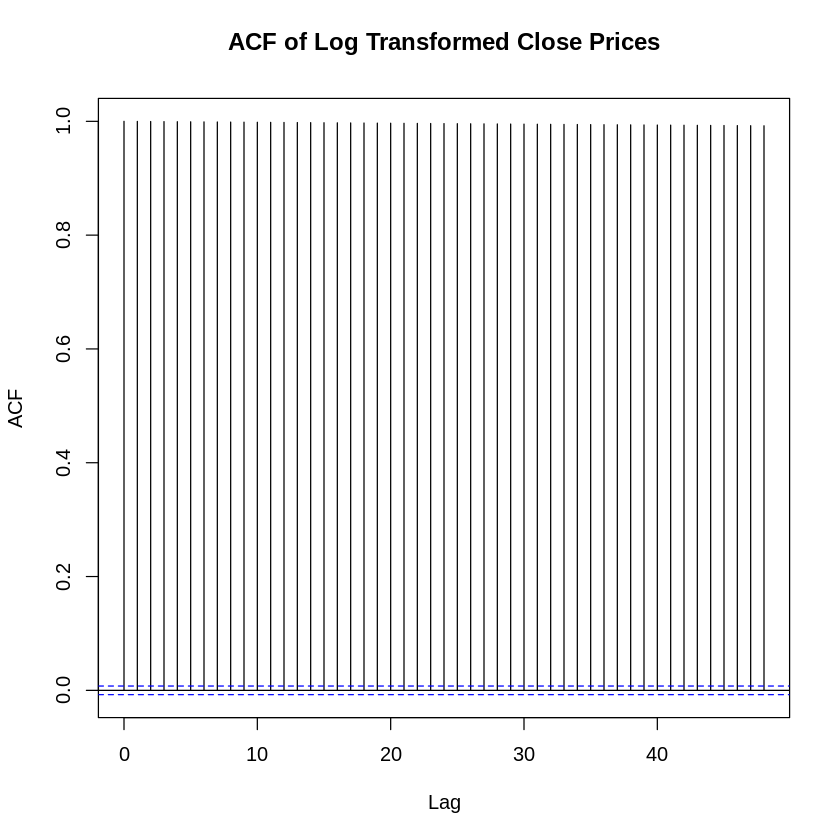

In [10]:
# Plot ACF
acf(log_close_ts, main = "ACF of Log Transformed Close Prices")

As seen previously that the series is non-staionary

In [9]:
# First-order differencing on Log transformed data
first_diff_data <- data.frame(Time = 1:length(log_close_ts), Close_diff = c(NA, diff(log_close_ts)))

In [10]:
head(first_diff_data)

,Time,Close_diff
,<int>,<dbl>
1,1,NA
2,2,0.001505076
3,3,0.002090358
4,4,0.005911706
5,5,0.002456755
6,6,0.018924570


In [11]:
# Remove all NA rows
first_diff_data <- na.omit(first_diff_data)

In [12]:
# Count how many NA values exist
sum(is.na(first_diff_data$Close_diff))
# Find index positions of NAs
which(is.na(first_diff_data$Close_diff))

[1] 0

integer(0)

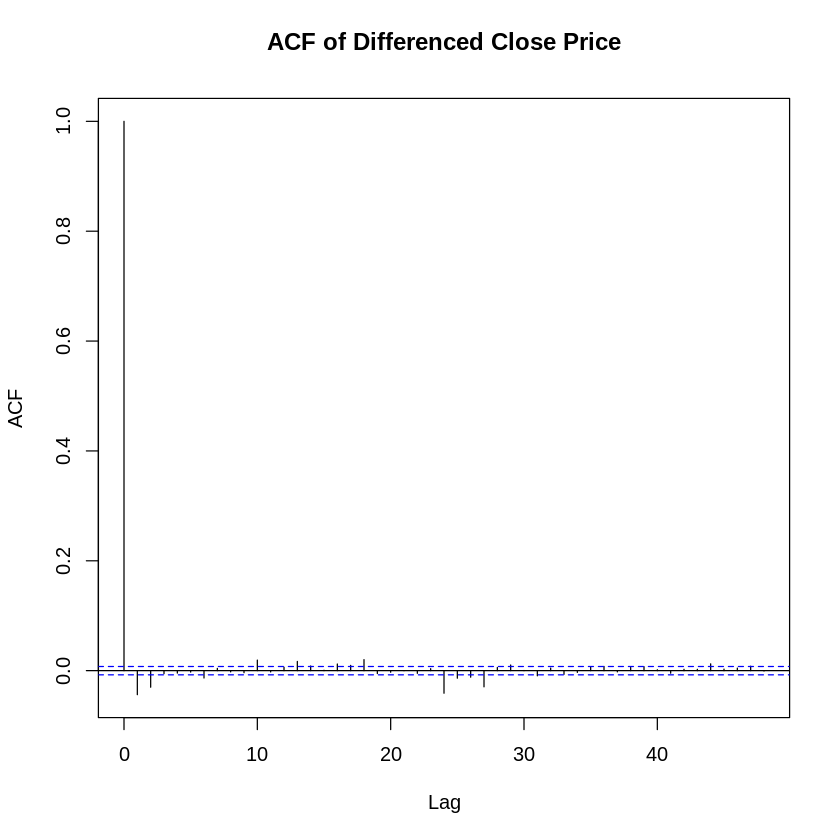

In [19]:
# convert to time series
close_diff_ts <- ts(first_diff_data$Close_diff)
acf(close_diff_ts, main = "ACF of Differenced Close Price")

The series became stationary after applying a first-order difference(all spikes are very close to the bounds exept lag 1), suggesting that the original data had a linear trend.

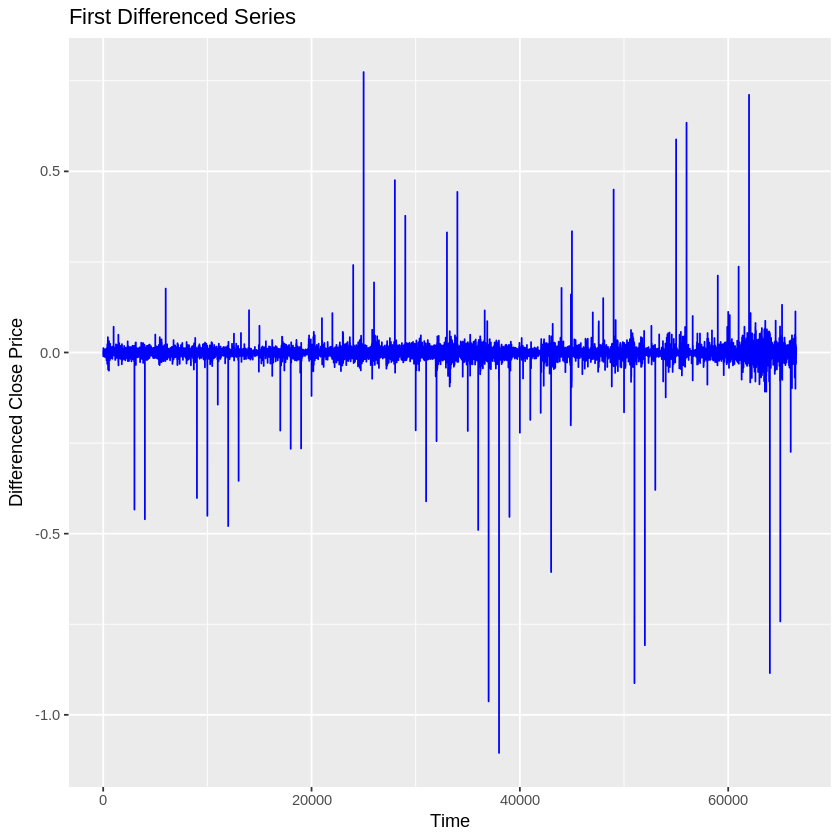

In [50]:
# Convert time series back to a data frame
plot_data <- data.frame(
  Time = 1:length(close_diff_ts),
  Close_diff = as.numeric(close_diff_ts)
)

# Now plot with ggplot
ggplot(plot_data, aes(x = Time, y = Close_diff)) +
  geom_line(color = "blue") +
  ggtitle("First Differenced Series") +
  xlab("Time") +
  ylab("Differenced Close Price")


The upward trend in the series disappeared after differencing. However, significant volatility remains despite variance stabilization, which is expected in financial time series.

#### 2.3 Choosing candidate models

To choose our best model, we will consider:

- ACF/PACF Behavior (AR vs. MA structure)
- Estimate parameters for candidate models using AIC/BIC Scores (Lower = better model fit)
- Residual Diagnostics: Perform a Portmanteau test to see if residuals are white noise., and if residuals are white noise, proceed to forecasting.

> First:
- Plot ACF (Autocorrelation Function) to check lag dependencies.
- Plot PACF (Partial Autocorrelation Function) to identify AR terms.

We will  first split our data into test and train subsets, the fiting will be done on the training set

In [14]:
# Load necessary library
library(forecast)

# Define train-test split (70% train, 30% test)
train_size <- round(length(close_diff_ts) * 0.7)
train_ts <- close_diff_ts[1:train_size]
test_ts <- close_diff_ts[(train_size + 1):length(close_diff_ts)]

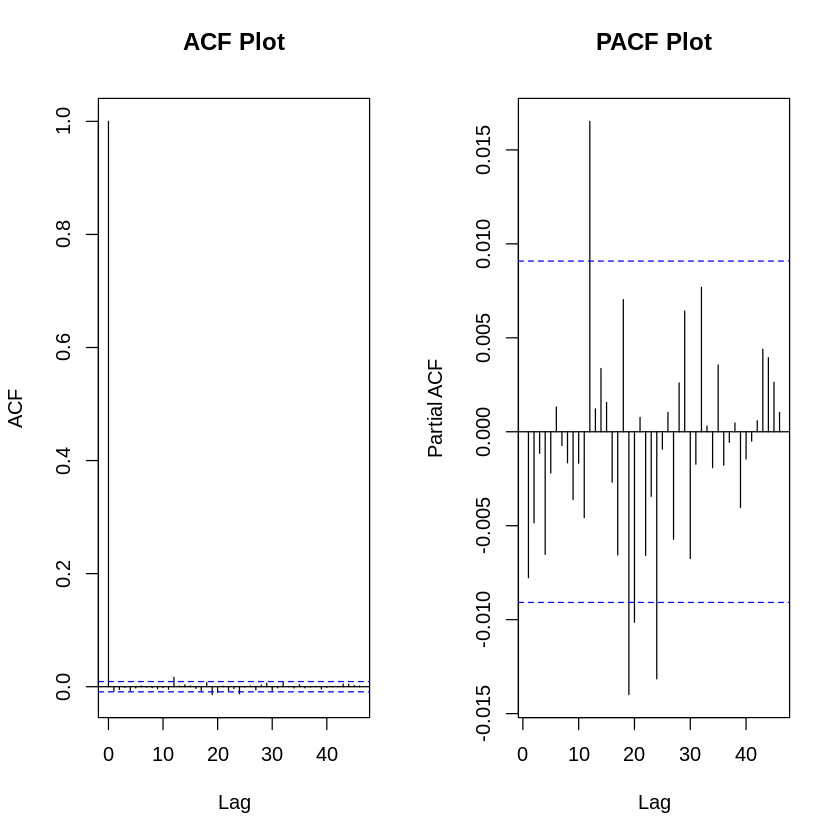

In [17]:
library(forecast)
par(mfrow = c(1, 2))  # Split plot into two
acf(train_ts, main="ACF Plot")   # Check for q (MA)
pacf(train_ts, main="PACF Plot") # Check for p (AR)

Observations:
- ACF (Autocorrelation Function) Plot:
  - The ACF has a significant spike at lag 1 and quickly drops to nearly zero( a clear cutoff at lag 1 suggesting MA(1)).
  - This suggests that the series has a low correlation beyond lag 1.
  - If it were an MA(1) process, we would expect PACF to decay slowly, which is not the case here.

- PACF (Partial Autocorrelation Function) Plot:
  - The PACF has a few significant spikes (around 3), but they do not show a clear pattern.
  - The spikes might indicate some dependencies but they are very close to zero, and they don’t seem periodic.

  - Since the PACF is only significant for three lags and then a drop, this suggests an AR(3).
  - If it were a pure AR(3), the ACF would be gradually declining which is not the case here.

Results:
This suggests that this is an arma process.

**Conclusion:**
- The presence of both AR-like and MA-like behaviors suggests that an ARMA model might be appropriate.


However; since our series became stationary after differencing, we will model it using ARIMA.
- **SARIMA:**
  - Earlier it was mentionned that SARIMA might not be appropriate for our dataset and this is further confimed by looking at the seasonal ACF/PACF, no strong periodic spikes appear thus seasonality might not be significant in the global dataset.

- **ARIMA:**
Since we will model our series using ARIMA, we now need to determine the best order (p, d, q):
  - How ACF & PACF help in selecting ARIMA parameters:
    - p (AR order - Autoregressive part) → Determined by PACF

    - q (MA order - Moving Average part) → Determined by ACF

    - d (Differencing order) → We already found d = 1(used to acheive stationarity)

In [17]:
install.packages("TSA")
library(TSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


Attaching package: ‘TSA’


The following object is masked from ‘package:readr’:

    spec


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




We will be using the **Bayesian Information Criterion (BIC)** values for different model configurations.

Lower BIC values indicate a better-fitting model while penalizing complexity.

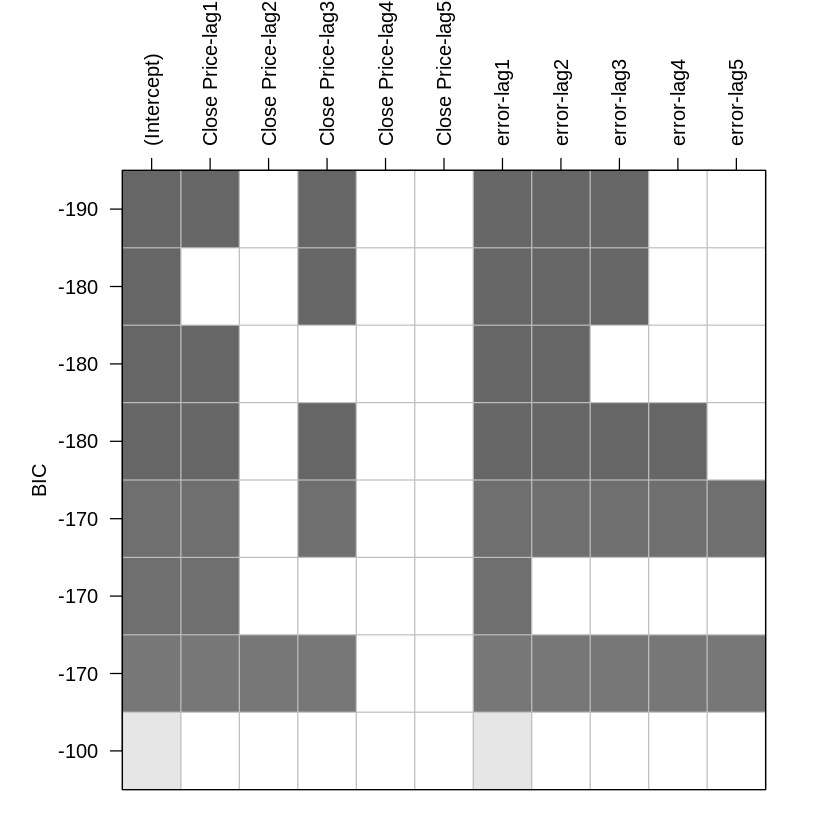

In [21]:
best_lags <- armasubsets(y = train_ts, nar = 5, nma = 5, y.name = "Close Price", ar.method = "ols")
# Ploting the selection results
plot(best_lags)

**Row 1 (Best Model 1) includes:**

- Intercept (a constant term in the model)
- Close Price Lag1 → This suggests that an AutoRegressive (AR) component with lag 1 is important, meaning p=1.

- Close Price Lag3 → This suggests that an AutoRegressive (AR) component with lag 3 is important, meaning p=3.
- error-lag1 → This suggests that a Moving - Average (MA) component with lag 1 is important, meaning 𝑞=1
- error-lag2 → This suggests that a Moving - Average (MA) component with lag 2 is important, meaning 𝑞=2
- error-lag3 → This suggests that a Moving - Average (MA) component with lag 3 is important, meaning 𝑞=3


**Row 2 (Best Model 2) includes:**

- Intercept
- Close Price Lag3 → This suggests that an AutoRegressive (AR) component with lag 3 is important, meaning p=3.
- error-lag1 → This suggests that a Moving - Average (MA) component with lag 1 is important, meaning 𝑞=1
- error-lag2 → This suggests that a Moving - Average (MA) component with lag 2 is important, meaning 𝑞=2
- error-lag3 → This suggests that a Moving - Average (MA) component with lag 3 is important, meaning 𝑞=3


**Row 3 (Best Model 3) includes:**
- Intercept
- Close Price Lag1 → This suggests that an AutoRegressive (AR) component with lag 1 is important, meaning p=1.
- error-lag1 → This suggests that a Moving - Average (MA) component with lag 1 is important, meaning 𝑞=1
- error-lag2 → This suggests that a Moving - Average (MA) component with lag 2 is important, meaning 𝑞=2

**Row 4 (Best Model 4) includes:**

- Intercept
- Close Price Lag1 → This suggests that an AutoRegressive (AR) component with lag 1 is important, meaning p=1.
- Close Price Lag3 → This suggests that an AutoRegressive (AR) component with lag 3 is important, meaning p=3.
- error-lag1 → This suggests that a Moving - Average (MA) component with lag 1 is important, meaning 𝑞=1
- error-lag2 → This suggests that a Moving - Average (MA) component with lag 2 is important, meaning 𝑞=2
- error-lag3 → This suggests that a Moving - Average (MA) component with lag 3 is important, meaning 𝑞=3

- error-lag4 → This suggests that a Moving - Average (MA) component with lag 4 is important, meaning 𝑞=4



Thus:
- Row 1 (Best Model 1) → ARIMA(3,0,3)
- Row 2 (Best Model 2) → ARIMA(3,0,3)
- Row 3 (Best Model 3) → ARIMA(1,0,2)
- Row 4 (Best Model 4) → ARIMA(3,0,4)

- Another model we will suggest is ARIMA(3,1,1)  because of the cutttof in PACF after lag 3 suggesting AR(3)

##### **AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion)**

We will be analysing ARIMA models **ARIMA(3,1,3), ARIMA(1,1,2), and ARIMA(3,1,4), ARIMA(3,1,1)** But we will set d=0 because the series has been differenced above

In [31]:
library(forecast)

train_copy <- train_ts
# The train is already differenced once so d will be set to 0 to avoid another difference
# Fit ARIMA(3,1,3)
model1 <- Arima(train_copy, order = c(3,0,3))

# Fit ARIMA(1,1,2)
model2 <- Arima(train_copy, order = c(1,0,2))

# Fit ARIMA(3,1,4)
model3 <- Arima(train_copy, order = c(3,0,4))

# Fit ARIMA(3,1,1)
model4 <- Arima(train_copy, order = c(3,0,1))

# Compare AIC and BIC
AIC(model1, model2, model3, model4)
BIC(model1, model2, model3, model4)


,df,AIC
,<dbl>,<dbl>
model1,8,-305440.1
model2,5,-305439.6
model3,9,-305436.6
model4,6,-305438.9


,df,BIC
,<dbl>,<dbl>
model1,8,-305370.2
model2,5,-305395.9
model3,9,-305357.9
model4,6,-305386.4


**Interpretation of AIC & BIC Scores:**

- AIC Criterion (Best Fit Model)
  - Scores are very close.
  - Our previously guessed model ARIMA(3,0,1) (Model 4) is very close to the top model scores
  -  ARIMA(3,0,3) (Model 1) has the lowest AIC (-305440.1), making it the best in terms of fit


- BIC Criterion (Best Simplicity)
  - Model 2 has the lowest BIC (-305395.9), which suggests it's the best model when considering model complexity.


According to the **parsimony principle (Occam’s Razor)**, Model 2 **ARIMA(1,0,2)** is the better choice because it has the lowest BIC (-305395.9).

##### Portmanteau Test
We will now perform **Portmanteau Test** to check whether the residuals of these ARIMA models behave like white noise

In [29]:
# Perform Ljung-Box test on residuals of ARIMA(1,1,2)
Box.test(residuals(model2), type = "Ljung-Box", lag = 20)


	Box-Ljung test

data:  residuals(model2)
X-squared = 109.93, df = 20, p-value = 2.021e-14


**Result interpretation:**
- The p-value is extremely small (<< 0.05), which means we reject the null hypothesis that the residuals are white noise.

- Meaning the model ARIMA(1,1,2)  has some remaining autocorrelation and may not fully capture the structure of the data.

In [32]:
# Perform Ljung-Box test on residuals ARIMA(3,1,3)
Box.test(residuals(model1), type = "Ljung-Box", lag = 20)



	Box-Ljung test

data:  residuals(model1)
X-squared = 105.78, df = 20, p-value = 1.147e-13


It would seem ARIMA(3,1,3) also failed the Portmanteau Test

However, since ARIMA(1,1,2) has the lowest AIC and BIC (following the parsimony principle), it is still preferred

> At the start of candidates selection, we fully **rejected** **SARIMA** modeling of the series, that is because SARIMA assumes a clear seasonal pattern, but crypto prices are highly volatile and don’t always follow strict cycles, even though in the previous small subsets of dataset we saw clear periods, the global data periodicity couldn't be determined as it appeared very noisy.

In the cell below we will try adding a component to ARIMA(1,1,2) to confirm this choice

In [42]:
sarima_model_1 <- Arima(train_ts, order = c(1,0,2),
                        seasonal = list(order = c(1,0,1), period = 24))


	Ljung-Box test

data:  Residuals from ARIMA(1,0,2)(1,0,1)[24] with non-zero mean
Q* = 36.419, df = 5, p-value = 7.829e-07

Model df: 5.   Total lags used: 10



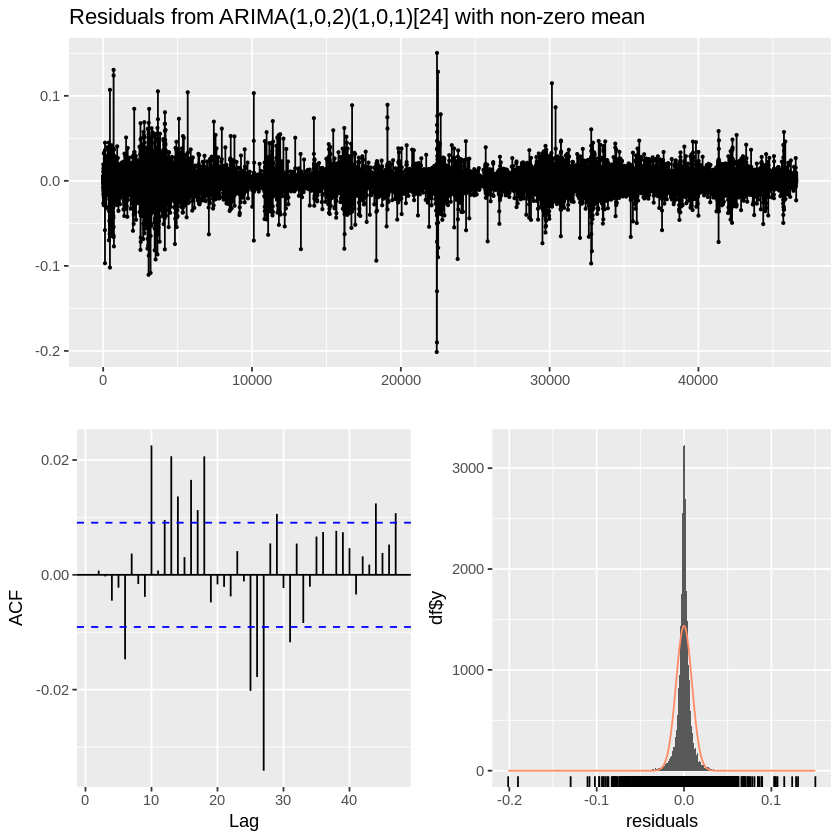

In [43]:
checkresiduals(sarima_model_1)

As is shown it didn't fit better than regular ARIMA

##### ACF/PACF
As a final check we will plot the acf plot, this step will be repeated in more detail in the next step of **Fitting**, but for now will help us establish a preliminary ranking of these two models(who is best)

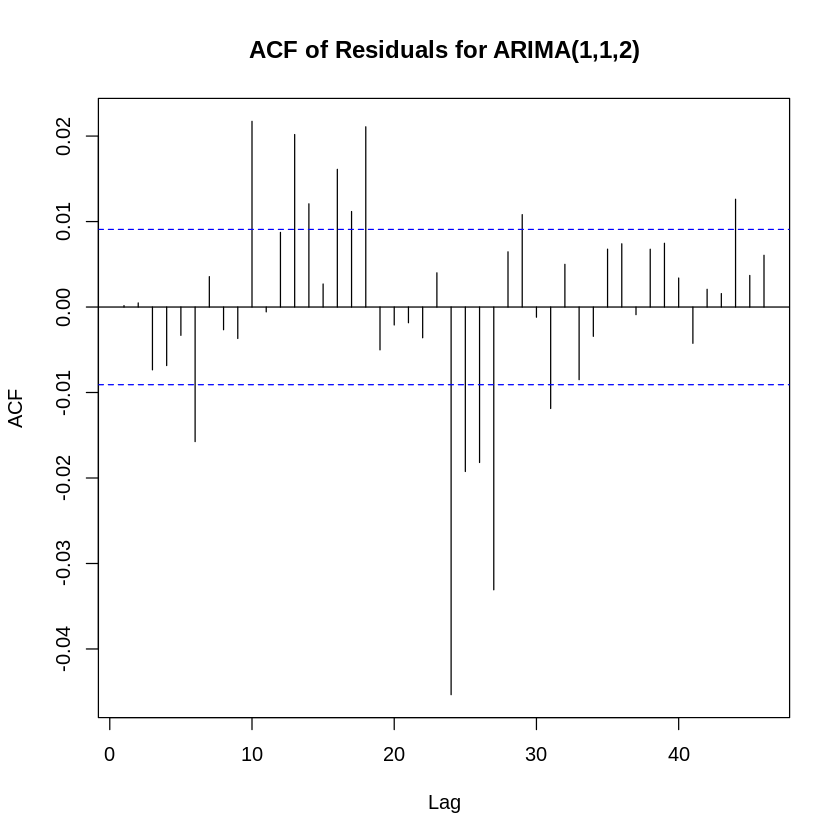

In [44]:
# Compute residuals of the model
residuals_model <- residuals(model2)

# Plot ACF of residuals
acf(residuals_model, main = "ACF of Residuals for ARIMA(1,1,2)")


Even though the Ljung-Box test gave a low p-value (suggesting some structure in residuals), the visual confirmation from the ACF plot indicates that this structure is weak. This suggests our ARIMA model is likely well-fitted.

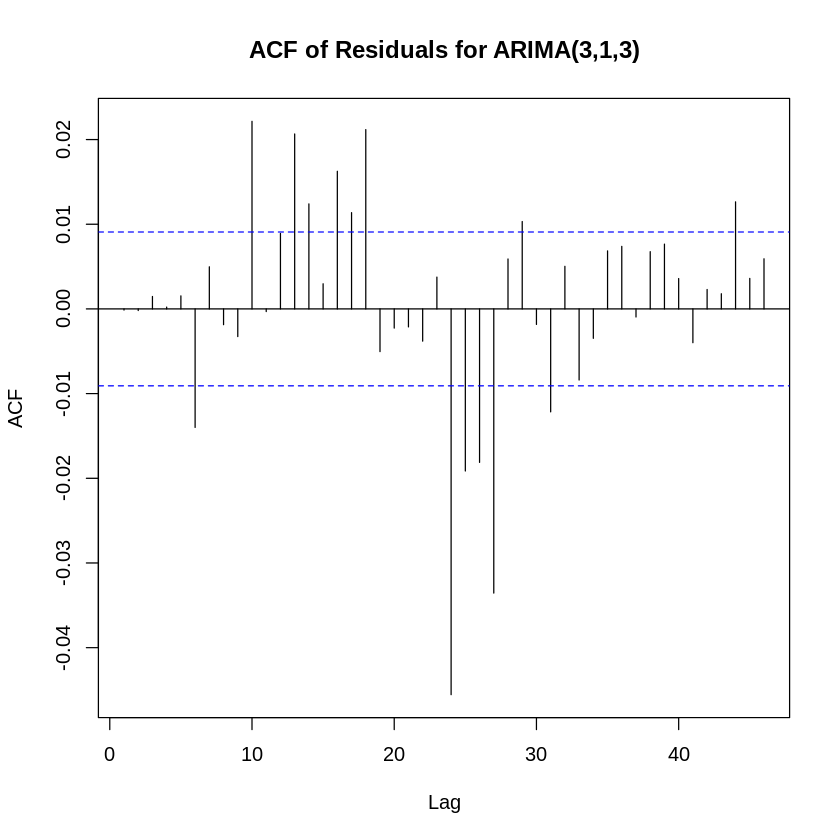

In [46]:
# Compute residuals of the model
residuals_model <- residuals(model1)

# Plot ACF of residuals
acf(residuals_model, main = "ACF of Residuals for ARIMA(3,1,3)")

Both plots seem identical, with the same out of bound spikes in similar frenquencies

**Final Models Selection:**
- **ARIMA(1,1,2)**
  - Higher BIC score
- **ARIMA(3,1,3)**
  - Better AIC score
  - Higher Ljung-Box p-value

Following the principle of parsimony, ARIMA(1,1,2) is preferred.

## 3.Fitting & Diagnostics

Residual plots (to ensure no patterns remain).

ACF/PACF of residuals (to confirm they are white noise).

Residual distribution (should be approximately normal).

We will fit both candiate models to design a final model  

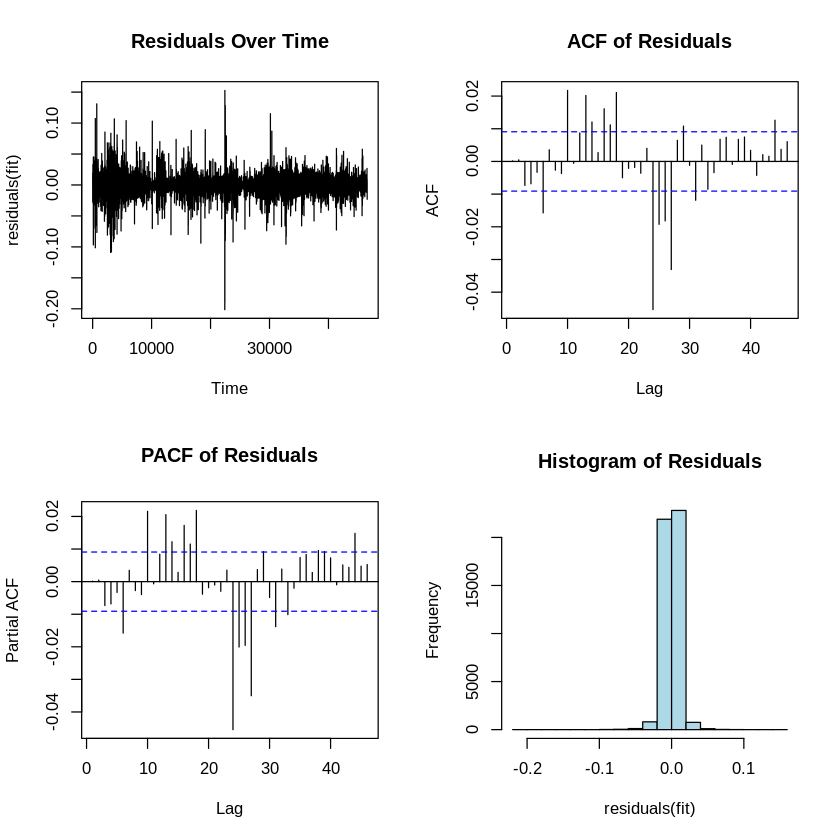

In [49]:
# Fit first ARIMA model ARIMA(1,1,2)
fit <- arima(train_ts, order = c(1,0,2)) #The series is already differenced once
# Residual Diagnostics
par(mfrow = c(2,2))
plot(residuals(fit), main = "Residuals Over Time")
acf(residuals(fit), main = "ACF of Residuals")
pacf(residuals(fit), main = "PACF of Residuals")
hist(residuals(fit), main = "Histogram of Residuals", col = "lightblue")

- First left plot: The residuals seem to be centered around zero, with the exeption of some outliers even after stabilization.

- **The autocorrelation function (ACF):** the majority of the autocorrelation values are within the blue confidence bands, indicating white noise. It shows some spikes that are not taken into consideration as they are very close to the bounds(according to TASC course).

- **Meaning:** The residuals resemble white noise, this suggests that the ARIMA model has captured most of the dependencies in the data.

- **PACF:** only a few spikes beyond the blue confidence bands, these are also not taken into consideration as they are close to the bounds.


- The residuals appear approximately normally distributed. Minor Issue: The histogram suggests slightly skewed residuals, this is caused because of the heavy skewness of the original dataset.

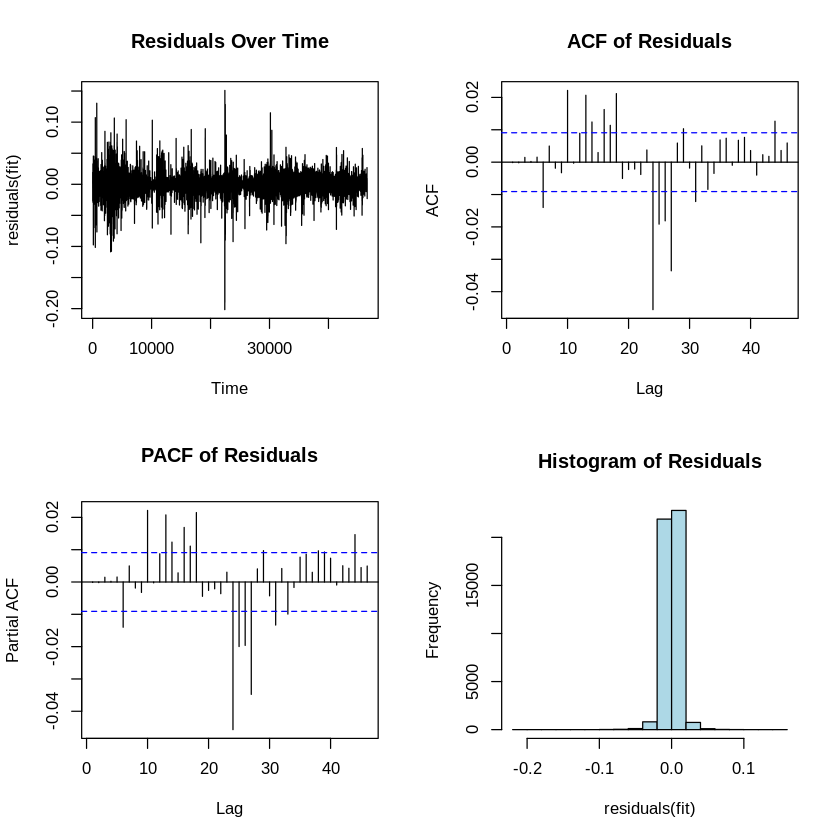

In [50]:
# Fit second ARIMA model ARIMA(3,1,3)
fit <- arima(train_ts, order = c(3,0,3))

# Residual Diagnostics
par(mfrow = c(2,2))
plot(residuals(fit), main = "Residuals Over Time")
acf(residuals(fit), main = "ACF of Residuals")
pacf(residuals(fit), main = "PACF of Residuals")
hist(residuals(fit), main = "Histogram of Residuals", col = "lightblue")

Both plots seem quite similar in their residual diagnostics.
- From a quick visual comparison, they appear nearly identical. We will be going our previously chosen model **ARIMA(1,1,2)**

## 4. Forecasting

Using the ARIMA model to forecast future values. Since our residual analysis indicates a good fit of the model we can proceed with generating forecasts for the desired number of steps ahead.

Fit ARIMA on Differenced Train Data


In [51]:
# Fit ARIMA model on train data
model <- Arima(train_ts, order = c(1,0,2))

# Forecast for the test set length
forecasted_diff <- forecast(model, h = length(test_ts))$mean


Reverse Differencing to Get Original Forecast

In [52]:
# Reverse Differencing
last_train_value <- tail(log_close_ts[1:train_size], 1)  # Use last train value BEFORE differencing
forecast_log <- cumsum(c(last_train_value, forecasted_diff))[-1]

# Reverse Log Transformation
forecast_final <- exp(forecast_log)

# Get actual test values in the original scale
test_original <- close_ts[(train_size + 1):length(close_ts)]


In [53]:
min_length <- min(length(test_original), length(forecast_final))
test_original <- test_original[1:min_length]
forecast_final <- forecast_final[1:min_length]


Plotting

[1] "RMSE: 34373.6442"


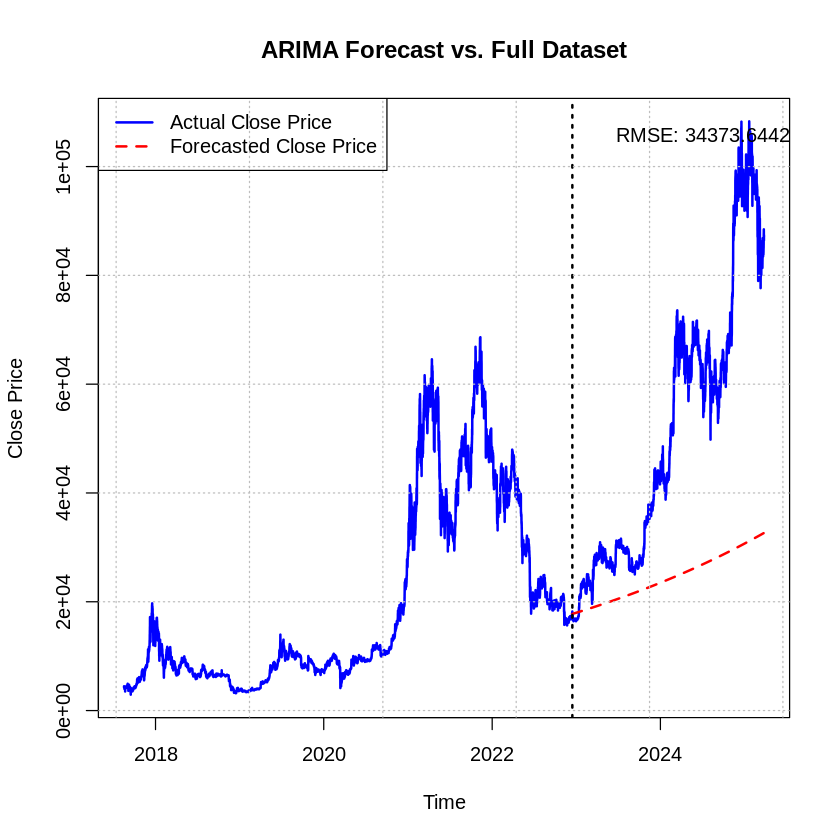

In [54]:
# Create time index for full dataset
time_index <- data$Close_Time

# Plot full dataset (actual close prices)
plot(time_index, close_ts, type = "l", col = "blue", lwd = 2,
     ylab = "Close Price", xlab = "Time",
     main = "ARIMA Forecast vs. Full Dataset", ylim = range(c(close_ts, forecast_final)))

# Overlay forecasted values for the test set
lines(time_index[(train_size + 1):(train_size + length(forecast_final))], forecast_final,
      col = "red", lwd = 2, lty = 2)

# Add a vertical line to indicate the split between training and test data
abline(v = time_index[train_size], col = "black", lwd = 2, lty = 3)

# Add grid for better readability
grid(col = "gray", lty = "dotted")

# Add legend
legend("topleft", legend = c("Actual Close Price", "Forecasted Close Price"),
       col = c("blue", "red"), lty = c(1, 2), lwd = c(2, 2))

# Compute RMSE and display
rmse <- sqrt(mean((test_original - forecast_final)^2))
mtext(paste("RMSE:", round(rmse, 4)), side = 3, line = -2, adj = 1, col = "black")
print(paste("RMSE:", round(rmse, 4)))


 Evaluate Performance

[1] "RMSE: 34373.6442"


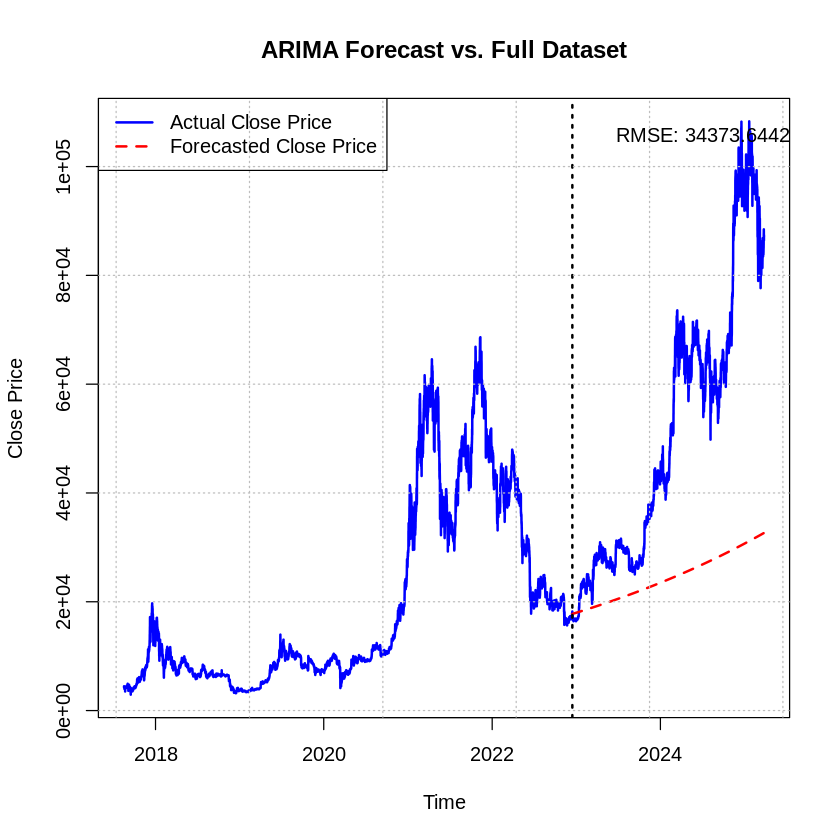

In [58]:
# Create time index for full dataset
time_index <- data$Close_Time

# Plot full dataset (actual close prices)
plot(time_index, close_ts, type = "l", col = "blue", lwd = 2,
     ylab = "Close Price", xlab = "Time",
     main = "ARIMA Forecast vs. Full Dataset", ylim = range(c(close_ts, forecast_final)))

# Overlay forecasted values for the test set
lines(time_index[(train_size + 1):(train_size + length(forecast_final))], forecast_final,
      col = "red", lwd = 2, lty = 2)

# Add a vertical line to indicate the split between training and test data
abline(v = time_index[train_size], col = "black", lwd = 2, lty = 3)

# Add grid for better readability
grid(col = "gray", lty = "dotted")

# Add legend
legend("topleft", legend = c("Actual Close Price", "Forecasted Close Price"),
       col = c("blue", "red"), lty = c(1, 2), lwd = c(2, 2))



In [64]:
# Compute RMSE and MAE
rmse <- sqrt(mean((test_original - forecast_final)^2))
mae <- mean(abs(test_original - forecast_final))

# Print results in console
print(paste("RMSE:", round(rmse, 4)))
print(paste("MAE:", round(mae, 4)))


[1] "RMSE: 34373.6442"
[1] "MAE: 27061.1978"


The predictions differ from actual values by around 27,061 units (MAE), with some larger deviations increasing the RMSE to about 34,373. While there's room for improvement, these values aren't necessarily bad—it just means there might be occasional larger errors.

## 4.**Conclusion and Future Work**  

> This study aimed to model **Bitcoin** price movements using **ARIMA-based** time series forecasting. After performing **exploratory data analysis** and **differencing** the data once, the series achieved stationarity.
However, residual autocorrelation analysis still indicated some **lingering dependencies**, suggesting the presence of non-stationary behavior, possibly due to the **inherent volatility** and **unpredictable nature of cryptocurrency** markets.  

While **ARIMA** provided a structured approach to modeling **trends**, the results show that it struggled to capture sudden price jumps and regime shifts effectively. The relatively **high** **RMSE** suggests that the model did not fully generalize to future price behavior. Given that Bitcoin price movements exhibit characteristics of a **random walk**, future work could explore models specifically designed for non-stationary time series, such as:  

- **Random Walk with Drift**: To model cryptocurrency price movements that follow a stochastic trend.  
- **GARCH Models**: To capture time-varying volatility, which is a common trait in financial data.  
- **Machine Learning Approaches**: Such as LSTMs or attention-based models, which may better handle long-term dependencies and complex patterns.  



Despite the challenges, this study provides valuable insights into **Bitcoin price dynamics** and serves as a **foundation** for further research. The findings contribute to the broader discussion on cryptocurrency price predictability, reinforcing the importance of model selection based on data characteristics. Future enhancements could involve incorporating external variables (e.g., market sentiment(from reddit comments..), trading volume) to improve forecasting accuracy.  

By addressing these aspects, this study has demonstrated a rigorous attempt at time series modeling for cryptocurrency forecasting, highlighting both its strengths and limitations while paving the way for future advancements.